# 환경설정

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
import matplotlib.pyplot as plt

In [4]:
kospi_index = pd.read_excel('https://github.com/SNMHZ/DART_8TH/raw/master/mock_investing/data/kospi_index.xlsx', index_col=0)

In [5]:
kospi_list = pd.read_excel('https://github.com/SNMHZ/DART_8TH/raw/master/mock_investing/data/kospi_list.xlsx', index_col=0)

In [6]:
%%time
pricedata = pd.read_excel('https://github.com/SNMHZ/DART_8TH/raw/master/mock_investing/data/revised_price.xlsx', index_col=0)

In [7]:
pricedata_kospi = pricedata[kospi_list.columns]

# DATA

In [ ]:
kospi_index

,코스피
Symbol Name,
2016-01-04,1918.76
2016-01-05,1930.53
2016-01-06,1925.43
2016-01-07,1904.33
2016-01-08,1917.62
...,...
2021-03-23,3004.74
2021-03-24,2996.35
2021-03-25,3008.33


In [ ]:
kospi_list

,A005930,A000660,A035420,A051910,A207940,A005380,A006400,A035720,A068270,A000270,A005490,A012330,A051900,A066570,A028260,A017670,A105560,A036570,A034730,A096770,A055550,A032830,A003550,A090430,A015760,A018260,A009150,A086790,A003670,A011200,A033780,A251270,A011170,A302440,A018880,A003490,A009540,A010950,A009830,A000810,...,A018500,A007630,A019180,A005820,A006880,A024070,A109070,A072130,A010660,A015020,A010770,A018470,A025530,A002690,A033250,A009810,A003680,A069640,A011420,A011300,A009140,A010640,A030720,A012600,A014910,A010420,A011230,A084870,A071950,A005030,A015260,A001210,A001420,A003280,A001770,A002420,A004920,A025890,A010580,A008500
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Symbol Name,삼성전자,SK하이닉스,NAVER,LG화학,삼성바이오로직스,현대차,삼성SDI,카카오,셀트리온,기아차,POSCO,현대모비스,LG생활건강,LG전자,삼성물산,SK텔레콤,KB금융,엔씨소프트,SK,SK이노베이션,신한지주,삼성생명,LG,아모레퍼시픽,한국전력,삼성에스디에스,삼성전기,하나금융지주,포스코케미칼,HMM,KT&G,넷마블,롯데케미칼,SK바이오사이언스,한온시스템,대한항공,한국조선해양,S-Oil,한화솔루션,삼성화재,...,동원금속,폴루스바이오팜,티에이치엔,원림,신송홀딩스,WISCOM,컨버즈,유엔젤,화천기계,이스타코,평화홀딩스,조일알미늄,SJM홀딩스,동일제강,체시스,엔케이물산,한성기업,한세엠케이,갤럭시아에스엠,성안,경인전자,진양폴리,동원수산,센트럴인사이트,성문전자,한솔PNS,삼화전자,TBH글로벌,코아스,부산주공,에이엔피,금호전기,태원물산,흥아해운,신화실업,세기상사,씨아이테크,한국주강,지코,일정실업


In [ ]:
pricedata

,A005930,A000660,A035420,A051910,A207940,A005380,A006400,A035720,A068270,A000270,A005490,A012330,A051900,A066570,A028260,A017670,A105560,A091990,A036570,A034730,A096770,A055550,A032830,A003550,A090430,A015760,A018260,A009150,A086790,A003670,A011200,A033780,A251270,A011170,A302440,A018880,A003490,A009540,A010950,A009830,...,A307160,A307870,A341160,A368770,A367360,A313750,A340440,A365590,A033600,A353190,A226350,A332710,A366330,A353070,A351320,A344050,A337450,A330990,A369370,A372290,A195440,A331380,A343510,A331520,A329560,A311270,A349720,A323280,A373200,A321260,A310870,A310840,A121890,A114570,A335870,A058420,A080440,A323210,A347140,A158310
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-04,24100,30150,126580,341500,NaN,144000,112500,115754,76834,50800,164000,238000,1015000,52500,140000,210500,32450,NaN,204000,234500,126000,39000,106500,69300,412500,50000,250500,60300,22900,12812,25778,105000,NaN,245000,NaN,10500,16459,77669,78000,25881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4363,58681,NaN,2903,6664,NaN,NaN,7230
2016-01-05,24160,30600,127581,339500,NaN,143500,115000,117561,77781,50700,169000,237000,1006000,54300,140000,210000,32650,NaN,214000,241000,127000,39400,107500,70700,410500,50700,249500,61600,23250,12530,24876,105500,NaN,250000,NaN,10380,16185,76943,78600,25638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4687,59270,NaN,2943,6705,NaN,NaN,6860
2016-01-06,23500,30750,124777,338000,NaN,140000,114500,119569,78987,49400,168500,234500,1012000,54700,144000,208000,32450,NaN,213000,239000,126000,39050,104000,70300,417000,50800,250000,61200,23300,12624,23716,106500,NaN,260000,NaN,10400,16063,78124,77100,27141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4598,60802,NaN,2943,6698,NaN,NaN,6810
2016-01-07,23260,30200,130585,323000,NaN,137500,111000,117762,78987,49300,164000,237000,1002000,55000,143000,204000,32050,NaN,219500,240500,123500,38650,102500,68600,410000,50300,244500,61600,22650,12906,22620,104000,NaN,253500,NaN,10180,16002,76489,75400,25978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4581,58563,NaN,2963,6631,NaN,NaN,6910
2016-01-08,23420,29700,130585,330000,NaN,136500,113000,115654,83122,48500,165000,238500,1005000,55900,142000,208000,32100,NaN,218500,241500,130500,38700,105000,68200,413000,49900,245500,61300,22850,12906,21750,107000,NaN,264500,NaN,9900,15636,77215,78700,26268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4628,58681,NaN,2958,6563,NaN,NaN,6850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23,81800,135000,386000,775000,713000.0,226500,624000,490500,292500,83500,313000,286500,1505000,145500,120000,250500,51400,128700.0,931000,242500,202000,35900,76200,86100,251500,22750,185500,185000,41050,143000,28450,80300,125500.0,310000,140500.0,18400,27300,116000,80200,43650,...,2170.0,2070.0,2095.0,2050.0,2030.0,2135.0,2070.0,2080.0,179,2180.0,214.0,2090.0,2060.0,2085.0,2090.0,2090.0,2105.0,2080.0,2095.0,2055.0,2075.0,2115.0,2090.0,2100.0,2040.0,2145.0,2045.0,2100.0,2070.0,2095.0,2105.0,2105.0,739,620,2165.0,308,498,2065.0,2055.0,505
2021-03-24,81000,133500,387000,784000,716000.0,221000,635000,492000,300000,81800,306000,283000,1541000,146500,118500,249000,51000,131500.0,936000,244000,204500,35100,75200,85900,256000,22800,184500,186500,40950,148000,29150,

In [ ]:
pricedata_kospi

,A005930,A000660,A035420,A051910,A207940,A005380,A006400,A035720,A068270,A000270,A005490,A012330,A051900,A066570,A028260,A017670,A105560,A036570,A034730,A096770,A055550,A032830,A003550,A090430,A015760,A018260,A009150,A086790,A003670,A011200,A033780,A251270,A011170,A302440,A018880,A003490,A009540,A010950,A009830,A000810,...,A018500,A007630,A019180,A005820,A006880,A024070,A109070,A072130,A010660,A015020,A010770,A018470,A025530,A002690,A033250,A009810,A003680,A069640,A011420,A011300,A009140,A010640,A030720,A012600,A014910,A010420,A011230,A084870,A071950,A005030,A015260,A001210,A001420,A003280,A001770,A002420,A004920,A025890,A010580,A008500
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-04,24100,30150,126580,341500,NaN,144000,112500,115754,76834,50800,164000,238000,1015000,52500,140000,210500,32450,204000,234500,126000,39000,106500,69300,412500,50000,250500,60300,22900,12812,25778,105000,NaN,245000,NaN,10500,16459,77669,78000,25881,308000,...,2395,2100,1800,20256,9060,4840,169740,5450,2585,1470,3490,2440,5600,3100,2984,1833,9370,13350,3380,999,18800,2800,8810,6219,2995,1698,5154,10800,2705,1319,10117,12791,3825,3185,18689,46750,2091,2735,713,29200
2016-01-05,24160,30600,127581,339500,NaN,143500,115000,117561,77781,50700,169000,237000,1006000,54300,140000,210000,32650,214000,241000,127000,39400,107500,70700,410500,50700,249500,61600,23250,12530,24876,105500,NaN,250000,NaN,10380,16185,76943,78600,25638,305000,...,2395,2025,1900,19825,9330,4854,170016,5570,2600,1485,3485,2425,5670,3145,3154,1910,9040,13000,3290,1000,18900,2800,8760,6239,2960,1737,5266,11000,2695,1445,10241,12891,3825,3193,18200,47100,2048,3130,715,29350
2016-01-06,23500,30750,124777,338000,NaN,140000,114500,119569,78987,49400,168500,234500,1012000,54700,144000,208000,32450,213000,239000,126000,39050,104000,70300,417000,50800,250000,61200,23300,12624,23716,106500,NaN,260000,NaN,10400,16063,78124,77100,27141,311500,...,2390,1980,1865,18963,9340,4835,160632,5610,2590,1460,3495,2430,5650,3210,3104,1933,9160,12900,3375,1000,19050,2800,8420,6127,2760,1675,5084,10850,2525,1423,9807,12791,3620,3062,17710,48300,2048,3080,705,28250
2016-01-07,23260,30200,130585,323000,NaN,137500,111000,117762,78987,49300,164000,237000,1002000,55000,143000,204000,32050,219500,240500,123500,38650,102500,68600,410000,50300,244500,61600,22650,12906,22620,104000,NaN,253500,NaN,10180,16002,76489,75400,25978,302500,...,2376,1905,1800,18388,9280,4874,155388,5400,2590,1415,3555,2315,5630,3285,2933,2002,9030,12550,3400,988,19050,2800,8510,6158,2550,1653,4789,10300,2420,1323,9341,12841,3795,2957,17977,49100,1983,3075,699,28300
2016-01-08,23420,29700,130585,330000,NaN,136500,113000,115654,83122,48500,165000,238500,1005000,55900,142000,208000,32100,218500,241500,130500,38700,105000,68200,413000,49900,245500,61300,22850,12906,21750,107000,NaN,264500,NaN,9900,15636,77215,78700,26268,303500,...,2376,1885,1830,18436,9040,4844,155664,5200,2545,1365,3455,2325,5540,3290,2951,1971,8530,12500,3410,989,18900,2800,8450,6137,2550,1653,4550,10500,2435,1400,9217,12593,3700,2940,17666,47800,1876,3000,704,28750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23,81800,135000,386000,775000,713000.0,226500,624000,490500,292500,83500,313000,286500,1505000,145500,120000,250500,51400,931000,242500,202000,35900,76200,86100,251500,22750,185500,185000,41050,143000,28450,80300,125500.0,310000,140500.0,18400,27300,116000,80200,43650,185000,...,1180,1225,3100,23500,4400,3630,4100,3955,2410,1175,3720,595,3485,3345,1525,613,7820,3620,1645,787,27700,4260,8790,3905,2060,1940,3770,1745,1170,624,1360,2645,4115,258,23750,61600,940,1790,306,15050
2021-03-24,81000,133500,387000,784000,716000.0,221000,635000,4920

# getBeta


## study

### set variable

In [ ]:
A005930_change = pricedata_kospi['A005930'].pct_change(1).iloc[1:]#*100

In [ ]:
kospi_change = kospi_index.코스피.pct_change(1).iloc[1:]#*100

### entire interval


In [ ]:
(np.cov(A005930_change, kospi_change)/np.var(kospi_change))

array([[2.49970746, 1.16677427],
       [1.16677427, 1.00077942]])

In [ ]:
(np.cov(A005930_change, kospi_change)/np.var(kospi_index.코스피.pct_change(1).iloc[1:]))[0,1]

1.1667742685095217

### selected interval

In [ ]:
a = 1100
b = 1200

In [ ]:
(np.cov(A005930_change.iloc[a:b], kospi_change.iloc[a:b])/np.var(kospi_change.iloc[a:b]))#[0,1]

array([[2.27303906, 1.11203446],
       [1.11203446, 1.01010101]])

In [ ]:
a = '2016-09-29'
b = '2017-09-29'

In [ ]:
( np.cov(A005930_change.loc[a:b], kospi_change.loc[a:b])/np.var(kospi_change.loc[a:b]))#[0,1]

array([[6.25022189, 1.51347554],
       [1.51347554, 1.004     ]])

### Compare with linear regression

In [ ]:
A005930_df=pd.DataFrame(A005930_change)
kospi_df=pd.DataFrame(kospi_change)

In [ ]:
model = LinearRegression(normalize=True)
model.fit(kospi_df,A005930_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

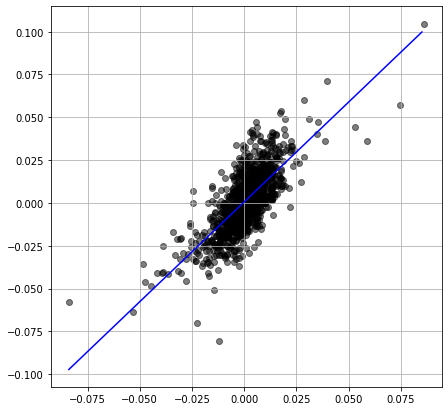

In [ ]:
 plt.figure(figsize=(7, 7))
plt.grid(True)
plt.scatter(kospi_change, A005930_change, color='black', alpha=0.5)
 
 
aran = np.arange(min(kospi_change) ,max(kospi_change) , 0.001)
plt.plot(aran, model.predict(aran.reshape(-1, 1)), color='blue')
 
plt.show()

In [ ]:
model.coef_ #기울기

array([[1.16586557]])

In [ ]:
( np.cov(A005930_change.loc[a:b], kospi_change.loc[a:b])/np.var(kospi_change.loc[a:b]))#[0,1]

array([[6.25022189, 1.51347554],
       [1.51347554, 1.004     ]])

In [ ]:
model = LinearRegression(normalize=True)
model.fit(kospi_df.loc[a:b],A005930_df.loc[a:b])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

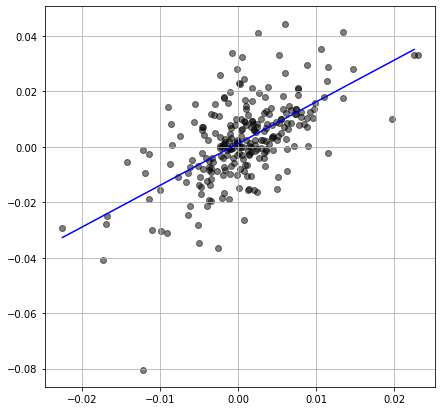

In [ ]:
plt.figure(figsize=(7, 7))
plt.grid(True)
plt.scatter(kospi_change.loc[a:b], A005930_change.loc[a:b], color='black', alpha=0.5)
 
 
aran = np.arange(min(kospi_change.loc[a:b]) ,max(kospi_change.loc[a:b]) , 0.001)
plt.plot(aran, model.predict(aran.reshape(-1, 1)), color='blue')
 
plt.show()

In [ ]:
model.coef_

array([[1.50744575]])

### using other lib

#### seaborn

In [ ]:
m_df = pd.concat([pricedata_kospi['A005930'], kospi_index['코스피']], axis=1)

In [ ]:
ret = (m_df.pct_change())*100
ret = ret.dropna()

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=fl

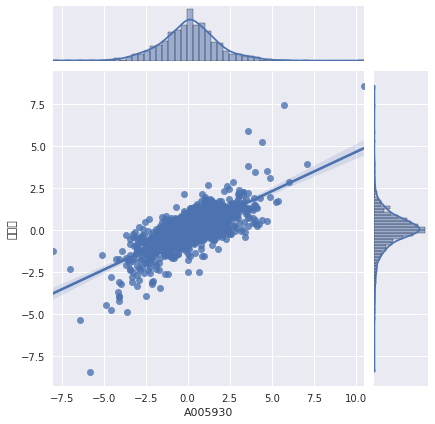

In [ ]:
with plt.style.context('seaborn'):
  sns.jointplot('A005930', '코스피', data=ret, kind='reg')

#### statsmodels, yahoo crawl

In [ ]:
from statsmodels import regression 
import statsmodels.api as sm 
import math 
import pandas_datareader as pdr

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
start = '2016-09-29' 
end = '2017-09-29' 
asset = pdr.DataReader("005930.KS","yahoo",start,end) 
benchmark = pdr.DataReader("^KS11","yahoo",start,end) 
r_a = asset.Close.pct_change()[1:] 
r_b = benchmark.Close.pct_change()[1:] 
X = r_b.values 
Y = r_a.values

In [ ]:
def linreg(x,y): 
  x = sm.add_constant(x) 
  model = regression.linear_model.OLS(y,x).fit() 
  x = x[:,1] 
  return model.params[0], model.params[1] 

In [ ]:
alpha, beta = linreg(X,Y) 
print ('alpha:' + str(alpha)) 
print ('beta:' + str(beta))

alpha:0.0011173972812106795
beta:1.474670734241953


## function

In [9]:
def getBeta(ticker, priceData, market, period, end=0, show_plot=False):
  price_change = priceData[ticker].pct_change()[1:]
  market_change = market[market.columns[0]].pct_change()[1:]
  
  start = end - period

  price_change_sliced = price_change.iloc[start:end]
  market_change_sliced = market_change.iloc[start:end]

  if show_plot:
    model = LinearRegression(normalize=True)
    model.fit(pd.DataFrame(market_change_sliced),pd.DataFrame(price_change_sliced))

    plt.figure(figsize=(7, 7))
    plt.grid(True)
    plt.scatter(market_change_sliced, price_change_sliced, color='black', alpha=0.5)
    aran = np.arange(min(market_change_sliced) ,max(market_change_sliced) , 0.001)
    plt.plot(aran, model.predict(aran.reshape(-1, 1)), color='blue')
    
    plt.show()

  return (np.cov(price_change_sliced, market_change_sliced)/np.var(market_change_sliced))[0,1]

In [ ]:
getBeta('A005930', pricedata_kospi, kospi_index, 5, 1150)

2.5301272703499653

### visualize

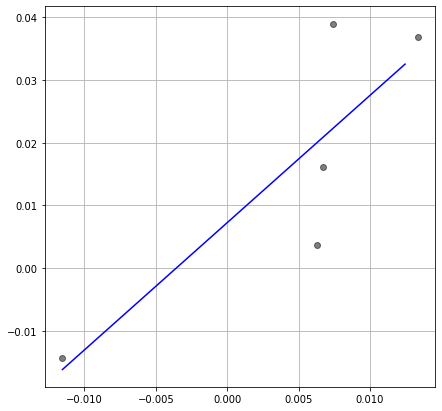

2.5301272703499653

In [ ]:
getBeta('A005930', pricedata_kospi, kospi_index, 5, 1150, True)

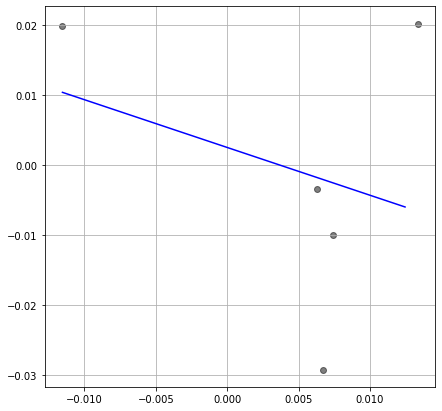

-0.8541080737967341

In [ ]:
getBeta('A096770', pricedata_kospi, kospi_index, 5, 1150, True)

# preprocess

In [10]:
observation_period = 230
observation_step = 5
forward_period = 50

## get Bag of Beta 

### study

In [ ]:
getBeta('A005930', pricedata_kospi, kospi_index, observation_period - observation_step, observation_period)

1.338483232167611

In [ ]:
current_period = observation_period
BoB_period = []
for _ in range(observation_period//observation_step):
  BoB_period.append(current_period)
  current_period = current_period - observation_step

In [ ]:
print(BoB_period)

[230, 225, 220, 215, 210, 205, 200, 195, 190, 185, 180, 175, 170, 165, 160, 155, 150, 145, 140, 135, 130, 125, 120, 115, 110, 105, 100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5]


In [ ]:
len(BoB_period)

46

In [ ]:
BoB1 = []
for period in BoB_period:
  BoB1.append( getBeta('A005930', pricedata_kospi, kospi_index, period, observation_period) )

In [ ]:
print(BoB1)

[1.3382264444727563, 1.338483232167611, 1.3629133157758555, 1.357541288421053, 1.3476501830083645, 1.3909228424245057, 1.4608371998796117, 1.4622738712120156, 1.473762492121536, 1.4511276844894487, 1.455293349662945, 1.4619397083009003, 1.4578647240333167, 1.4247349904120523, 1.443555275775096, 1.4623622245347394, 1.4531064770754956, 1.4901828279037217, 1.485211723418133, 1.4881974083828038, 1.5131737622178405, 1.532893368221538, 1.5558636510427415, 1.600898552124809, 1.7830537862397369, 1.7679226566914792, 1.8051019997627065, 1.8047218104989324, 1.7933881991555978, 1.7961377666072114, 1.8062837533197682, 1.7647722366052758, 1.7484796774616782, 1.754869807804507, 1.7143980124374287, 1.4277877193369457, 1.4827530701357168, 1.4513029781994735, 1.2770723597044995, 1.300162708260758, 1.2427216344129748, 1.4297185144388802, 1.492577848896454, 0.9282641981393811, 0.8872866921286957, 1.0698818756933366]


In [ ]:
BoB2 = []
for period in BoB_period[1:]:
  BoB2.append( getBeta('A005930', pricedata_kospi, kospi_index, observation_step, period) )

In [ ]:
print(BoB2)

[16.21269825742369, 1.8479008620577384, 3.963899520036132, 1.6742822441647935, -0.01956320961879328, 2.0124690095878806, -1.394523407986213, 3.341748237749634, 1.8898525459451494, 0.8868074581685187, 3.9031659069773577, 2.8836597085737634, 1.5500576026193096, 2.663178570685508, 6.8655554477411505, 4.2471244154489005, 2.391371550920754, 4.145715446731135, 2.353350489234139, 1.1611911400522124, 2.38895047146252, 0.8556284895695039, 0.25256036355792294, 2.3956160039265644, -0.389428512231251, -0.9776365709956211, 1.7419478238134225, 2.292295185959751, -1.34403633099323, 2.612334660648737, -0.32174554178353054, 0.9693200948791931, 5.479431073371882, 2.01318021285108, -0.057692268024680866, 0.8546807701667571, 4.14252561300287, 1.3597746411787917, 2.0405973655099037, 0.41127976818802203, 1.1692779974483773, 2.4261207996600134, 1.7524681157110595, 0.44169120880023555, 1.2746619956528744]


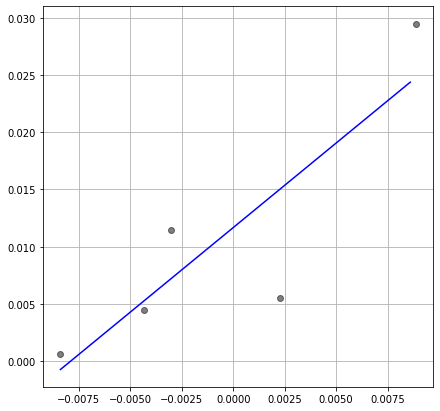

1.8479008620577384

In [ ]:
getBeta('A005930', pricedata_kospi, kospi_index, 5, 220, True)

In [ ]:
'A005930'+'_'+str(pricedata_kospi['A005930'].index[1150])[:10]

'A005930_2020-09-08'

### function

In [54]:
def getBoB(ticker, observation_time, observation_period=230, observation_step=5):
  try:
    BoB = []
    current_period = observation_time

    #get Bag of Beta Period
    #230, 225, 220 ... 5
    #460, 455, 450 ... 235
    count_step = observation_period//observation_step
    BoB_period = [x*5 for x in reversed(range(1, count_step+1))]
    BoB_time = [x*5+observation_period for x in reversed(range(1, count_step))]

    #기간 베타. 230, 225, 220 ... 5일간 관측 베타
    for period in BoB_period:
      BoB.append( getBeta(ticker, pricedata_kospi, kospi_index, period, observation_time) )

    #스텝 베타 벡터. 230~235, 235~240, 240~245 ... 베타 벡터
    for period in BoB_time:
      BoB.append( getBeta(ticker, pricedata_kospi, kospi_index, observation_step, period) )

    state = ticker+'_'+str(pricedata_kospi.index[observation_time])[:10]
    return state, BoB
  except:
    pass

In [ ]:
print(getBoB('A005930', 230))

('A005930_2016-12-08', [1.3382264444727563, 1.338483232167611, 1.3629133157758555, 1.357541288421053, 1.3476501830083645, 1.3909228424245057, 1.4608371998796117, 1.4622738712120156, 1.473762492121536, 1.4511276844894487, 1.455293349662945, 1.4619397083009003, 1.4578647240333167, 1.4247349904120523, 1.443555275775096, 1.4623622245347394, 1.4531064770754956, 1.4901828279037217, 1.485211723418133, 1.4881974083828038, 1.5131737622178405, 1.532893368221538, 1.5558636510427415, 1.600898552124809, 1.7830537862397369, 1.7679226566914792, 1.8051019997627065, 1.8047218104989324, 1.7933881991555978, 1.7961377666072114, 1.8062837533197682, 1.7647722366052758, 1.7484796774616782, 1.754869807804507, 1.7143980124374287, 1.4277877193369457, 1.4827530701357168, 1.4513029781994735, 1.2770723597044995, 1.300162708260758, 1.2427216344129748, 1.4297185144388802, 1.492577848896454, 0.9282641981393811, 0.8872866921286957, 1.0698818756933366, 16.21269825742369, 1.8479008620577384, 3.963899520036132, 1.6742822

### make BoB dataframe by function

In [ ]:
index_list = []
BoB_list = []
state, getedBoB = getBoB('A005930', 230)
index_list.append(state)
BoB_list.append(getedBoB)

state, getedBoB = getBoB('A000660', 230)
index_list.append(state)
BoB_list.append(getedBoB)
pd.DataFrame(BoB_list, index = index_list)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
A005930_2016-12-08,1.338226,1.338483,1.362913,1.357541,1.347650,1.390923,1.460837,1.462274,1.473762,1.451128,1.455293,1.461940,1.457865,1.424735,1.443555,1.462362,1.453106,1.490183,1.485212,1.488197,1.513174,1.532893,1.555864,1.600899,1.783054,1.767923,1.805102,1.804722,1.793388,1.796138,1.806284,1.764772,1.748480,1.754870,1.714398,1.427788,1.482753,1.451303,1.277072,1.300163,...,2.012469,-1.394523,3.341748,1.889853,0.886807,3.903166,2.883660,1.550058,2.663179,6.865555,4.247124,2.391372,4.145715,2.353350,1.161191,2.388950,0.855628,0.252560,2.395616,-0.389429,-0.977637,1.741948,2.292295,-1.344036,2.612335,-0.321746,0.969320,5.479431,2.013180,-0.057692,0.854681,4.142526,1.359775,2.040597,0.411280,1.169278,2.426121,1.752468,0.441691,1.274662
A000660_2016-12-08,1.254750,1.242087,1.220905,1.143546,1.168918,1.143197,1.176132,1.193249,1.155881,1.148405,1.159449,1.140309,1.151419,1.177920,1.217678,1.230552,1.181741,1.136567,1.147498,1.154808,1.140827,1.130129,1.133423,1.093474,1.279581,1.252857,1.232169,1.243898,1.294308,1.291827,1.270836,1.254326,1.320058,1.321684,1.359132,1.158966,1.110178,1.219141,1.288386,1.343966,...,-3.844314,1.892469,-0.926983,-0.148767,2.478864,2.924384,1.021111,1.633763,-3.430818,4.308348,5.767122,1.674073,-3.781900,-0.355802,1.436004,1.920113,0.227711,2.583001,3.332496,2.960672,2.386157,1.155460,-2.197846,5.364773,9.879625,0.002850,0.914555,-1.698873,0.413475,7.363421,2.396867,3.179932,3.392511,-8.037324,0.214193,1.648947,0.525433,2.551946,2.010890,1.757521


In [13]:
%%time
index_list = []
BoB_list = []
for i, ticker in enumerate(pricedata_kospi.columns):
  print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
  state, getedBoB = getBoB(ticker, 230)
  index_list.append(state)
  BoB_list.append(getedBoB)

784/784CPU times: user 2min, sys: 1.13 s, total: 2min 1s
Wall time: 2min 1s


In [18]:
BagOfBeta_df = pd.DataFrame(BoB_list, index = index_list)
BagOfBeta_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
A005930_2016-12-08,1.338226,1.338483,1.362913,1.357541,1.347650,1.390923,1.460837,1.462274,1.473762,1.451128,1.455293,1.461940,1.457865,1.424735,1.443555,1.462362,1.453106,1.490183,1.485212,1.488197,1.513174,1.532893,1.555864,1.600899,1.783054,1.767923,1.805102,1.804722,1.793388,1.796138,1.806284,1.764772,1.748480,1.754870,1.714398,1.427788,1.482753,1.451303,1.277072,1.300163,...,2.012469,-1.394523,3.341748,1.889853,0.886807,3.903166,2.883660,1.550058,2.663179,6.865555,4.247124,2.391372,4.145715,2.353350,1.161191,2.388950,0.855628,0.252560,2.395616,-0.389429,-0.977637,1.741948,2.292295,-1.344036,2.612335,-0.321746,0.969320,5.479431,2.013180,-0.057692,0.854681,4.142526,1.359775,2.040597,0.411280,1.169278,2.426121,1.752468,0.441691,1.274662
A000660_2016-12-08,1.254750,1.242087,1.220905,1.143546,1.168918,1.143197,1.176132,1.193249,1.155881,1.148405,1.159449,1.140309,1.151419,1.177920,1.217678,1.230552,1.181741,1.136567,1.147498,1.154808,1.140827,1.130129,1.133423,1.093474,1.279581,1.252857,1.232169,1.243898,1.294308,1.291827,1.270836,1.254326,1.320058,1.321684,1.359132,1.158966,1.110178,1.219141,1.288386,1.343966,...,-3.844314,1.892469,-0.926983,-0.148767,2.478864,2.924384,1.021111,1.633763,-3.430818,4.308348,5.767122,1.674073,-3.781900,-0.355802,1.436004,1.920113,0.227711,2.583001,3.332496,2.960672,2.386157,1.155460,-2.197846,5.364773,9.879625,0.002850,0.914555,-1.698873,0.413475,7.363421,2.396867,3.179932,3.392511,-8.037324,0.214193,1.648947,0.525433,2.551946,2.010890,1.757521
A035420_2016-12-08,0.861434,0.880686,0.942875,0.929793,1.022238,0.944639,0.941297,0.952954,0.872667,0.851025,0.862823,0.849210,0.825198,0.819878,0.834658,0.813038,0.837336,0.859475,0.865122,0.881773,0.882787,0.888311,0.861548,0.862927,0.990403,1.048864,1.090183,1.123572,1.138587,1.200190,1.136596,1.130692,1.124013,1.137770,1.104624,1.220170,1.203678,1.273073,1.140140,1.147087,...,-0.029655,-0.153473,4.418937,0.800789,1.491861,0.654032,1.985066,-0.633928,2.386834,1.619143,0.957756,-0.239178,0.008502,-5.110967,1.024880,0.545538,0.184477,-0.061731,2.282738,-0.063125,2.136879,0.457007,0.718656,-0.841012,-0.282530,3.803496,0.853582,1.873906,2.713141,4.117117,-2.098530,3.001397,4.869763,-4.708559,1.215291,1.800785,-1.505343,1.402332,-1.009300,0.088956
A051910_2016-12-08,1.481199,1.455214,1.423273,1.493332,1.411062,1.378351,1.364039,1.351593,1.331118,1.348830,1.334074,1.355190,1.323500,1.293191,1.255131,1.274977,1.283548,1.271304,1.228539,1.232156,1.246313,1.239002,1.270530,1.253393,1.067992,0.989141,0.942065,0.932957,0.907033,0.827452,0.836157,0.856197,0.907921,0.934806,1.012658,1.163759,1.231378,1.381751,1.452017,1.403880,...,2.170792,0.989871,0.513443,-0.107954,-0.351139,0.310480,-0.143304,-2.749334,-2.081686,-1.805443,-2.669613,3.886577,4.343200,3.471843,2.504793,2.244087,2.793548,3.538775,0.457588,2.632048,0.768096,1.393289,9.991961,2.669236,-0.699938,-0.345594,2.457860,5.207254,3.621127,-3.957193,3.189925,-0.030464,3.097066,8.400574,1.948529,2.562456,5.948757,0.817394,2.981492,2.876818
A207940_2016-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A002420_2016-12-08,0.729908,0.783592,0.814184,0.789416,0.809496,0.845487,0.841561,0

## get classification

In [ ]:
#개별 기간 수익률 상승 & 벤치마크 수익률 상회

In [15]:
#Period Yield
def getPY(start, end):
  return (end - start)/start

### Period Yield Test

In [ ]:
price_start = pricedata_kospi['A005930'].iloc[observation_period]
price_start

35800

In [ ]:
price_end = pricedata_kospi['A005930'].iloc[observation_period+forward_period]
price_end

38940

In [ ]:
(price_end - price_start)/price_start

0.08770949720670392

In [ ]:
getPY(price_start, price_end)

0.08770949720670392

In [ ]:
market_start = kospi_index['코스피'].iloc[observation_period]
market_start

2031.07

In [ ]:
market_end = kospi_index['코스피'].iloc[observation_period+forward_period]
market_end

2102.93

In [ ]:
(market_end - market_start)/market_start

0.03538036601397288

In [ ]:
getPY(market_start, market_end)

0.03538036601397288

In [ ]:
getPY(price_start, price_end) > 0 and getPY(price_start, price_end) > getPY(market_start, market_end)

True

### function

In [16]:
def getClassified(ticker, observation_time, forward_period=50):
  price_start = pricedata_kospi[ticker].iloc[observation_period]
  price_end = pricedata_kospi[ticker].iloc[observation_period+forward_period]
  market_start = kospi_index['코스피'].iloc[observation_period]
  market_end = kospi_index['코스피'].iloc[observation_period+forward_period]
  return getPY(price_start, price_end) > 0 and getPY(price_start, price_end) > getPY(market_start, market_end)

In [ ]:
getClassified('A005930', 230)

True

### make result set by function

In [17]:
classified_list = []
for i, ticker in enumerate(pricedata_kospi.columns):
  print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
  classified_list.append(getClassified(ticker, 230))

784/784

In [20]:
BagOfBeta_df['result'] = classified_list

In [21]:
BagOfBeta_df_droped = BagOfBeta_df.dropna()

In [22]:
BagOfBeta_df_droped

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,result
A005930_2016-12-08,1.338226,1.338483,1.362913,1.357541,1.347650,1.390923,1.460837,1.462274,1.473762,1.451128,1.455293,1.461940,1.457865,1.424735,1.443555,1.462362,1.453106,1.490183,1.485212,1.488197,1.513174,1.532893,1.555864,1.600899,1.783054,1.767923,1.805102,1.804722,1.793388,1.796138,1.806284,1.764772,1.748480,1.754870,1.714398,1.427788,1.482753,1.451303,1.277072,1.300163,...,-1.394523,3.341748,1.889853,0.886807,3.903166,2.883660,1.550058,2.663179,6.865555,4.247124,2.391372,4.145715,2.353350,1.161191,2.388950,0.855628,0.252560,2.395616,-0.389429,-0.977637,1.741948,2.292295,-1.344036,2.612335,-0.321746,0.969320,5.479431,2.013180,-0.057692,0.854681,4.142526,1.359775,2.040597,0.411280,1.169278,2.426121,1.752468,0.441691,1.274662,True
A000660_2016-12-08,1.254750,1.242087,1.220905,1.143546,1.168918,1.143197,1.176132,1.193249,1.155881,1.148405,1.159449,1.140309,1.151419,1.177920,1.217678,1.230552,1.181741,1.136567,1.147498,1.154808,1.140827,1.130129,1.133423,1.093474,1.279581,1.252857,1.232169,1.243898,1.294308,1.291827,1.270836,1.254326,1.320058,1.321684,1.359132,1.158966,1.110178,1.219141,1.288386,1.343966,...,1.892469,-0.926983,-0.148767,2.478864,2.924384,1.021111,1.633763,-3.430818,4.308348,5.767122,1.674073,-3.781900,-0.355802,1.436004,1.920113,0.227711,2.583001,3.332496,2.960672,2.386157,1.155460,-2.197846,5.364773,9.879625,0.002850,0.914555,-1.698873,0.413475,7.363421,2.396867,3.179932,3.392511,-8.037324,0.214193,1.648947,0.525433,2.551946,2.010890,1.757521,True
A035420_2016-12-08,0.861434,0.880686,0.942875,0.929793,1.022238,0.944639,0.941297,0.952954,0.872667,0.851025,0.862823,0.849210,0.825198,0.819878,0.834658,0.813038,0.837336,0.859475,0.865122,0.881773,0.882787,0.888311,0.861548,0.862927,0.990403,1.048864,1.090183,1.123572,1.138587,1.200190,1.136596,1.130692,1.124013,1.137770,1.104624,1.220170,1.203678,1.273073,1.140140,1.147087,...,-0.153473,4.418937,0.800789,1.491861,0.654032,1.985066,-0.633928,2.386834,1.619143,0.957756,-0.239178,0.008502,-5.110967,1.024880,0.545538,0.184477,-0.061731,2.282738,-0.063125,2.136879,0.457007,0.718656,-0.841012,-0.282530,3.803496,0.853582,1.873906,2.713141,4.117117,-2.098530,3.001397,4.869763,-4.708559,1.215291,1.800785,-1.505343,1.402332,-1.009300,0.088956,False
A051910_2016-12-08,1.481199,1.455214,1.423273,1.493332,1.411062,1.378351,1.364039,1.351593,1.331118,1.348830,1.334074,1.355190,1.323500,1.293191,1.255131,1.274977,1.283548,1.271304,1.228539,1.232156,1.246313,1.239002,1.270530,1.253393,1.067992,0.989141,0.942065,0.932957,0.907033,0.827452,0.836157,0.856197,0.907921,0.934806,1.012658,1.163759,1.231378,1.381751,1.452017,1.403880,...,0.989871,0.513443,-0.107954,-0.351139,0.310480,-0.143304,-2.749334,-2.081686,-1.805443,-2.669613,3.886577,4.343200,3.471843,2.504793,2.244087,2.793548,3.538775,0.457588,2.632048,0.768096,1.393289,9.991961,2.669236,-0.699938,-0.345594,2.457860,5.207254,3.621127,-3.957193,3.189925,-0.030464,3.097066,8.400574,1.948529,2.562456,5.948757,0.817394,2.981492,2.876818,True
A005380_2016-12-08,0.676756,0.702852,0.702668,0.695379,0.710232,0.679352,0.772897,0.775099,0.780006,0.802263,0.800600,0.786126,0.765701,0.787155,0.764507,0.745534,0.717148,0.670724,0.656287,0.670834,0.651853,0.659183,0.629282,0.613264,0.721701,0.620271,0.608810,0.599695,0.590395,0.516193,0.463969,0.492637,0.502358,0.492291,0.453635,0.510191,0.454433,0.324001,0.287065,0.285971,...,3.576006,-0.170659,2.313545,2.385931,0.208420,1.269311,2.262263,0.612910,-2.967075,4.734932,2.244322,1.045570,2.905746,1.345511,2.070903,0.016566,0.739474,1.651434,0.604933,2.591847,0.269059,1.549195,4.882712,2.884771,3.539693,1.186668,-1.579957,2.098192,6.793637,1.342837,-1.474238,0.909342,-0.110140,-1.748409,1.391338,0.777873,1.001903,0.880607,-0.710713,True
...,...,...,...,...,.

# Random Forset Classification

## only 230

In [23]:
train, test = train_test_split(BagOfBeta_df_droped, test_size=0.2, random_state=777)

In [24]:
train_x = train[train.columns[:-1]]
train_y = train[train.columns[-1]]

In [25]:
test_x = test[test.columns[:-1]]
test_y = test[test.columns[-1]]

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [36]:
rfc_model = RandomForestClassifier(n_estimators=100, random_state=777, max_depth = 100, min_samples_split = 0.001)
rfc_model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=777,
                       verbose=0, warm_start=False)

In [37]:
pred = rfc_model.predict(test_x)

print("Accuracy: %s" % str(rfc_model.score(test_x, test_y)))
print("Confusion Matrix")
print(confusion_matrix(pred, test_y, labels=[True, False]))

Accuracy: 0.6083916083916084
Confusion Matrix
[[55 30]
 [26 32]]


In [35]:
##정답
#True인데 True 55개
#False인데 False 32개
##오답
#True인데 False 30
#False인데 True 26 (문제있는 친구들)

## 230+460

### make df

In [56]:
%%time
#230시점 생성
index_list = []
BoB_list = []
for i, ticker in enumerate(pricedata_kospi.columns):
  print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
  state, getedBoB = getBoB(ticker, 230)
  index_list.append(state)
  BoB_list.append(getedBoB)
print()

784/784CPU times: user 2min 3s, sys: 997 ms, total: 2min 4s
Wall time: 2min 3s


In [57]:
%%time
#460시점 생성
for i, ticker in enumerate(pricedata_kospi.columns):
  print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
  state, getedBoB = getBoB(ticker, 460)
  index_list.append(state)
  BoB_list.append(getedBoB)
print()

784/784
CPU times: user 2min 2s, sys: 1.02 s, total: 2min 3s
Wall time: 2min 3s


In [58]:
BagOfBeta_df_230_460 = pd.DataFrame(BoB_list, index = index_list)
BagOfBeta_df_230_460

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
A005930_2016-12-08,1.338226,1.338483,1.362913,1.357541,1.347650,1.390923,1.460837,1.462274,1.473762,1.451128,1.455293,1.461940,1.457865,1.424735,1.443555,1.462362,1.453106,1.490183,1.485212,1.488197,1.513174,1.532893,1.555864,1.600899,1.783054,1.767923,1.805102,1.804722,1.793388,1.796138,1.806284,1.764772,1.748480,1.754870,1.714398,1.427788,1.482753,1.451303,1.277072,1.300163,...,-2.057266,3.026271,0.749069,1.785682,0.927805,0.648878,2.555923,1.910395,2.558089,2.566363,2.253052,0.575459,1.648875,2.940480,3.602700,1.894304,3.192075,3.276317,2.110682,1.296920,0.638460,6.622136,1.504686,-0.070883,0.602847,1.239400,2.000374,1.681891,1.404396,3.992485,0.317403,1.186953,-0.770792,1.987424,4.161994,2.901080,3.051549,1.056148,4.917341,1.980648
A000660_2016-12-08,1.254750,1.242087,1.220905,1.143546,1.168918,1.143197,1.176132,1.193249,1.155881,1.148405,1.159449,1.140309,1.151419,1.177920,1.217678,1.230552,1.181741,1.136567,1.147498,1.154808,1.140827,1.130129,1.133423,1.093474,1.279581,1.252857,1.232169,1.243898,1.294308,1.291827,1.270836,1.254326,1.320058,1.321684,1.359132,1.158966,1.110178,1.219141,1.288386,1.343966,...,-0.039130,1.191958,0.079624,0.004111,2.813305,0.870361,3.978080,2.311774,3.508367,6.727803,4.494073,5.866851,4.207799,5.680777,1.967961,2.778888,1.444210,0.556872,2.596057,2.345116,0.681337,-3.748944,0.844256,2.630603,7.742632,-3.423024,-3.001194,3.330272,1.446278,8.090961,-1.354777,-6.291540,3.270467,1.801854,3.203848,1.669019,2.933238,0.257831,6.100980,1.263442
A035420_2016-12-08,0.861434,0.880686,0.942875,0.929793,1.022238,0.944639,0.941297,0.952954,0.872667,0.851025,0.862823,0.849210,0.825198,0.819878,0.834658,0.813038,0.837336,0.859475,0.865122,0.881773,0.882787,0.888311,0.861548,0.862927,0.990403,1.048864,1.090183,1.123572,1.138587,1.200190,1.136596,1.130692,1.124013,1.137770,1.104624,1.220170,1.203678,1.273073,1.140140,1.147087,...,-1.888271,2.878658,4.180823,0.768748,2.331106,-3.247676,-0.472207,2.249312,1.469208,0.507057,2.271955,1.748778,0.134949,1.943806,-3.400550,7.860462,2.068875,0.296454,3.092196,4.375335,1.639354,1.572983,3.632818,1.944998,8.086779,-3.652865,4.886665,2.332576,2.018358,0.104550,0.839243,3.246921,0.888813,-1.509459,1.284209,1.016063,-1.135750,2.174155,5.399600,-0.778535
A051910_2016-12-08,1.481199,1.455214,1.423273,1.493332,1.411062,1.378351,1.364039,1.351593,1.331118,1.348830,1.334074,1.355190,1.323500,1.293191,1.255131,1.274977,1.283548,1.271304,1.228539,1.232156,1.246313,1.239002,1.270530,1.253393,1.067992,0.989141,0.942065,0.932957,0.907033,0.827452,0.836157,0.856197,0.907921,0.934806,1.012658,1.163759,1.231378,1.381751,1.452017,1.403880,...,10.409339,-0.853174,-0.804991,0.018259,3.268729,5.778220,-0.196287,2.634002,2.013340,4.998720,6.990801,4.079725,1.925127,2.555923,0.294914,1.933539,-2.393943,2.297430,3.833973,1.598859,1.401418,-3.648135,-0.587917,1.919953,4.711457,4.863253,2.481126,2.255025,1.979860,1.705557,1.559919,5.024892,4.370026,4.337346,3.083401,3.296542,5.083289,3.013304,-8.399359,2.802454
A207940_2016-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.363244,0.162678,6.453880,0.471566,-0.172309,4.186384,1.665601,0.292518,2.068120,-3.190769,0.639615,0.683197,1.521952,10.508638,1.398145,-0.424341,-2.367099,3.094234,-0.706140,2.536528,1.991557,5.271163,-0.113008,3.000080,5.806709,4.288867,1.971290,0.281435,0.082727,0.638322,4.078064,4.143288,-5.393259,3.069780,0.457867,4.934525,-1.292144,-5.279681,3.921147,8.577939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [59]:
classified_list = []
for i, ticker in enumerate(pricedata_kospi.columns):
  print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
  classified_list.append(getClassified(ticker, 230))

784/784

In [60]:
for i, ticker in enumerate(pricedata_kospi.columns):
  print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
  classified_list.append(getClassified(ticker, 460))

784/784

In [61]:
BagOfBeta_df_230_460['result'] = classified_list
BagOfBeta_df_230_460_droped = BagOfBeta_df_230_460.dropna()

In [62]:
BagOfBeta_df_230_460_droped

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,result
A005930_2016-12-08,1.338226,1.338483,1.362913,1.357541,1.347650,1.390923,1.460837,1.462274,1.473762,1.451128,1.455293,1.461940,1.457865,1.424735,1.443555,1.462362,1.453106,1.490183,1.485212,1.488197,1.513174,1.532893,1.555864,1.600899,1.783054,1.767923,1.805102,1.804722,1.793388,1.796138,1.806284,1.764772,1.748480,1.754870,1.714398,1.427788,1.482753,1.451303,1.277072,1.300163,...,3.026271,0.749069,1.785682,0.927805,0.648878,2.555923,1.910395,2.558089,2.566363,2.253052,0.575459,1.648875,2.940480,3.602700,1.894304,3.192075,3.276317,2.110682,1.296920,0.638460,6.622136,1.504686,-0.070883,0.602847,1.239400,2.000374,1.681891,1.404396,3.992485,0.317403,1.186953,-0.770792,1.987424,4.161994,2.901080,3.051549,1.056148,4.917341,1.980648,True
A000660_2016-12-08,1.254750,1.242087,1.220905,1.143546,1.168918,1.143197,1.176132,1.193249,1.155881,1.148405,1.159449,1.140309,1.151419,1.177920,1.217678,1.230552,1.181741,1.136567,1.147498,1.154808,1.140827,1.130129,1.133423,1.093474,1.279581,1.252857,1.232169,1.243898,1.294308,1.291827,1.270836,1.254326,1.320058,1.321684,1.359132,1.158966,1.110178,1.219141,1.288386,1.343966,...,1.191958,0.079624,0.004111,2.813305,0.870361,3.978080,2.311774,3.508367,6.727803,4.494073,5.866851,4.207799,5.680777,1.967961,2.778888,1.444210,0.556872,2.596057,2.345116,0.681337,-3.748944,0.844256,2.630603,7.742632,-3.423024,-3.001194,3.330272,1.446278,8.090961,-1.354777,-6.291540,3.270467,1.801854,3.203848,1.669019,2.933238,0.257831,6.100980,1.263442,True
A035420_2016-12-08,0.861434,0.880686,0.942875,0.929793,1.022238,0.944639,0.941297,0.952954,0.872667,0.851025,0.862823,0.849210,0.825198,0.819878,0.834658,0.813038,0.837336,0.859475,0.865122,0.881773,0.882787,0.888311,0.861548,0.862927,0.990403,1.048864,1.090183,1.123572,1.138587,1.200190,1.136596,1.130692,1.124013,1.137770,1.104624,1.220170,1.203678,1.273073,1.140140,1.147087,...,2.878658,4.180823,0.768748,2.331106,-3.247676,-0.472207,2.249312,1.469208,0.507057,2.271955,1.748778,0.134949,1.943806,-3.400550,7.860462,2.068875,0.296454,3.092196,4.375335,1.639354,1.572983,3.632818,1.944998,8.086779,-3.652865,4.886665,2.332576,2.018358,0.104550,0.839243,3.246921,0.888813,-1.509459,1.284209,1.016063,-1.135750,2.174155,5.399600,-0.778535,False
A051910_2016-12-08,1.481199,1.455214,1.423273,1.493332,1.411062,1.378351,1.364039,1.351593,1.331118,1.348830,1.334074,1.355190,1.323500,1.293191,1.255131,1.274977,1.283548,1.271304,1.228539,1.232156,1.246313,1.239002,1.270530,1.253393,1.067992,0.989141,0.942065,0.932957,0.907033,0.827452,0.836157,0.856197,0.907921,0.934806,1.012658,1.163759,1.231378,1.381751,1.452017,1.403880,...,-0.853174,-0.804991,0.018259,3.268729,5.778220,-0.196287,2.634002,2.013340,4.998720,6.990801,4.079725,1.925127,2.555923,0.294914,1.933539,-2.393943,2.297430,3.833973,1.598859,1.401418,-3.648135,-0.587917,1.919953,4.711457,4.863253,2.481126,2.255025,1.979860,1.705557,1.559919,5.024892,4.370026,4.337346,3.083401,3.296542,5.083289,3.013304,-8.399359,2.802454,True
A005380_2016-12-08,0.676756,0.702852,0.702668,0.695379,0.710232,0.679352,0.772897,0.775099,0.780006,0.802263,0.800600,0.786126,0.765701,0.787155,0.764507,0.745534,0.717148,0.670724,0.656287,0.670834,0.651853,0.659183,0.629282,0.613264,0.721701,0.620271,0.608810,0.599695,0.590395,0.516193,0.463969,0.492637,0.502358,0.492291,0.453635,0.510191,0.454433,0.324001,0.287065,0.285971,...,-0.555524,3.837505,1.862922,1.271754,-5.785445,1.413928,-1.039940,-1.159445,-2.001940,-0.831339,1.689548,3.475641,1.752661,7.740514,-0.902877,-0.806831,-0.082521,-4.622880,1.316102,3.101742,-0.866607,1.850197,-1.975505,2.043032,-1.471736,2.729297,0.580684,2.952885,-2.354925,-0.263419,0.238883,1.764684,1.894234,0.063998,-1.942392,0.891554,1.722479,-3.422478,-1.238860,True
...,...,...,...,...,...,..

### train

In [63]:
train, test = train_test_split(BagOfBeta_df_230_460_droped, test_size=0.2, random_state=777)

In [64]:
train_x = train[train.columns[:-1]]
train_y = train[train.columns[-1]]

In [65]:
test_x = test[test.columns[:-1]]
test_y = test[test.columns[-1]]

In [109]:
rfc_model_230_460 = RandomForestClassifier(n_estimators=1000, random_state=777, max_depth = 500, min_samples_split = 0.001)
rfc_model_230_460.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=500, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=777,
                       verbose=0, warm_start=False)

In [110]:
pred = rfc_model_230_460.predict(test_x)

print("Accuracy: %s" % str(rfc_model_230_460.score(test_x, test_y)))
print("Confusion Matrix")
print(confusion_matrix(pred, test_y, labels=[True, False]))

Accuracy: 0.8298611111111112
Confusion Matrix
[[127  31]
 [ 18 112]]


## 230+460+690

### make df

In [111]:
%%time
#230시점 생성
index_list = []
BoB_list = []
for i, ticker in enumerate(pricedata_kospi.columns):
  print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
  state, getedBoB = getBoB(ticker, 230)
  index_list.append(state)
  BoB_list.append(getedBoB)
print()

784/784
CPU times: user 2min 2s, sys: 1.12 s, total: 2min 3s
Wall time: 2min 3s


In [112]:
%%time
#460시점 생성
for i, ticker in enumerate(pricedata_kospi.columns):
  print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
  state, getedBoB = getBoB(ticker, 460)
  index_list.append(state)
  BoB_list.append(getedBoB)
print()

784/784
CPU times: user 2min 2s, sys: 1.07 s, total: 2min 3s
Wall time: 2min 3s


In [113]:
%%time
#690시점 생성
for i, ticker in enumerate(pricedata_kospi.columns):
  print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
  state, getedBoB = getBoB(ticker, 690)
  index_list.append(state)
  BoB_list.append(getedBoB)
print()

784/784
CPU times: user 2min 3s, sys: 1.03 s, total: 2min 4s
Wall time: 2min 4s


In [114]:
BagOfBeta_df_230_460_690 = pd.DataFrame(BoB_list, index = index_list)
BagOfBeta_df_230_460_690

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
A005930_2016-12-08,1.338226,1.338483,1.362913,1.357541,1.347650,1.390923,1.460837,1.462274,1.473762,1.451128,1.455293,1.461940,1.457865,1.424735,1.443555,1.462362,1.453106,1.490183,1.485212,1.488197,1.513174,1.532893,1.555864,1.600899,1.783054,1.767923,1.805102,1.804722,1.793388,1.796138,1.806284,1.764772,1.748480,1.754870,1.714398,1.427788,1.482753,1.451303,1.277072,1.300163,...,-2.057266,3.026271,0.749069,1.785682,0.927805,0.648878,2.555923,1.910395,2.558089,2.566363,2.253052,0.575459,1.648875,2.940480,3.602700,1.894304,3.192075,3.276317,2.110682,1.296920,0.638460,6.622136,1.504686,-0.070883,0.602847,1.239400,2.000374,1.681891,1.404396,3.992485,0.317403,1.186953,-0.770792,1.987424,4.161994,2.901080,3.051549,1.056148,4.917341,1.980648
A000660_2016-12-08,1.254750,1.242087,1.220905,1.143546,1.168918,1.143197,1.176132,1.193249,1.155881,1.148405,1.159449,1.140309,1.151419,1.177920,1.217678,1.230552,1.181741,1.136567,1.147498,1.154808,1.140827,1.130129,1.133423,1.093474,1.279581,1.252857,1.232169,1.243898,1.294308,1.291827,1.270836,1.254326,1.320058,1.321684,1.359132,1.158966,1.110178,1.219141,1.288386,1.343966,...,-0.039130,1.191958,0.079624,0.004111,2.813305,0.870361,3.978080,2.311774,3.508367,6.727803,4.494073,5.866851,4.207799,5.680777,1.967961,2.778888,1.444210,0.556872,2.596057,2.345116,0.681337,-3.748944,0.844256,2.630603,7.742632,-3.423024,-3.001194,3.330272,1.446278,8.090961,-1.354777,-6.291540,3.270467,1.801854,3.203848,1.669019,2.933238,0.257831,6.100980,1.263442
A035420_2016-12-08,0.861434,0.880686,0.942875,0.929793,1.022238,0.944639,0.941297,0.952954,0.872667,0.851025,0.862823,0.849210,0.825198,0.819878,0.834658,0.813038,0.837336,0.859475,0.865122,0.881773,0.882787,0.888311,0.861548,0.862927,0.990403,1.048864,1.090183,1.123572,1.138587,1.200190,1.136596,1.130692,1.124013,1.137770,1.104624,1.220170,1.203678,1.273073,1.140140,1.147087,...,-1.888271,2.878658,4.180823,0.768748,2.331106,-3.247676,-0.472207,2.249312,1.469208,0.507057,2.271955,1.748778,0.134949,1.943806,-3.400550,7.860462,2.068875,0.296454,3.092196,4.375335,1.639354,1.572983,3.632818,1.944998,8.086779,-3.652865,4.886665,2.332576,2.018358,0.104550,0.839243,3.246921,0.888813,-1.509459,1.284209,1.016063,-1.135750,2.174155,5.399600,-0.778535
A051910_2016-12-08,1.481199,1.455214,1.423273,1.493332,1.411062,1.378351,1.364039,1.351593,1.331118,1.348830,1.334074,1.355190,1.323500,1.293191,1.255131,1.274977,1.283548,1.271304,1.228539,1.232156,1.246313,1.239002,1.270530,1.253393,1.067992,0.989141,0.942065,0.932957,0.907033,0.827452,0.836157,0.856197,0.907921,0.934806,1.012658,1.163759,1.231378,1.381751,1.452017,1.403880,...,10.409339,-0.853174,-0.804991,0.018259,3.268729,5.778220,-0.196287,2.634002,2.013340,4.998720,6.990801,4.079725,1.925127,2.555923,0.294914,1.933539,-2.393943,2.297430,3.833973,1.598859,1.401418,-3.648135,-0.587917,1.919953,4.711457,4.863253,2.481126,2.255025,1.979860,1.705557,1.559919,5.024892,4.370026,4.337346,3.083401,3.296542,5.083289,3.013304,-8.399359,2.802454
A207940_2016-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.363244,0.162678,6.453880,0.471566,-0.172309,4.186384,1.665601,0.292518,2.068120,-3.190769,0.639615,0.683197,1.521952,10.508638,1.398145,-0.424341,-2.367099,3.094234,-0.706140,2.536528,1.991557,5.271163,-0.113008,3.000080,5.806709,4.288867,1.971290,0.281435,0.082727,0.638322,4.078064,4.143288,-5.393259,3.069780,0.457867,4.934525,-1.292144,-5.279681,3.921147,8.577939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [115]:
classified_list = []
for i, ticker in enumerate(pricedata_kospi.columns):
  print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
  classified_list.append(getClassified(ticker, 230))

784/784

In [116]:
for i, ticker in enumerate(pricedata_kospi.columns):
  print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
  classified_list.append(getClassified(ticker, 460))

784/784

In [117]:
for i, ticker in enumerate(pricedata_kospi.columns):
  print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
  classified_list.append(getClassified(ticker, 690))

784/784

In [119]:
BagOfBeta_df_230_460_690['result'] = classified_list
BagOfBeta_df_230_460_690_droped = BagOfBeta_df_230_460_690.dropna()

In [120]:
BagOfBeta_df_230_460_690_droped

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,result
A005930_2016-12-08,1.338226,1.338483,1.362913,1.357541,1.347650,1.390923,1.460837,1.462274,1.473762,1.451128,1.455293,1.461940,1.457865,1.424735,1.443555,1.462362,1.453106,1.490183,1.485212,1.488197,1.513174,1.532893,1.555864,1.600899,1.783054,1.767923,1.805102,1.804722,1.793388,1.796138,1.806284,1.764772,1.748480,1.754870,1.714398,1.427788,1.482753,1.451303,1.277072,1.300163,...,3.026271,0.749069,1.785682,0.927805,0.648878,2.555923,1.910395,2.558089,2.566363,2.253052,0.575459,1.648875,2.940480,3.602700,1.894304,3.192075,3.276317,2.110682,1.296920,0.638460,6.622136,1.504686,-0.070883,0.602847,1.239400,2.000374,1.681891,1.404396,3.992485,0.317403,1.186953,-0.770792,1.987424,4.161994,2.901080,3.051549,1.056148,4.917341,1.980648,True
A000660_2016-12-08,1.254750,1.242087,1.220905,1.143546,1.168918,1.143197,1.176132,1.193249,1.155881,1.148405,1.159449,1.140309,1.151419,1.177920,1.217678,1.230552,1.181741,1.136567,1.147498,1.154808,1.140827,1.130129,1.133423,1.093474,1.279581,1.252857,1.232169,1.243898,1.294308,1.291827,1.270836,1.254326,1.320058,1.321684,1.359132,1.158966,1.110178,1.219141,1.288386,1.343966,...,1.191958,0.079624,0.004111,2.813305,0.870361,3.978080,2.311774,3.508367,6.727803,4.494073,5.866851,4.207799,5.680777,1.967961,2.778888,1.444210,0.556872,2.596057,2.345116,0.681337,-3.748944,0.844256,2.630603,7.742632,-3.423024,-3.001194,3.330272,1.446278,8.090961,-1.354777,-6.291540,3.270467,1.801854,3.203848,1.669019,2.933238,0.257831,6.100980,1.263442,True
A035420_2016-12-08,0.861434,0.880686,0.942875,0.929793,1.022238,0.944639,0.941297,0.952954,0.872667,0.851025,0.862823,0.849210,0.825198,0.819878,0.834658,0.813038,0.837336,0.859475,0.865122,0.881773,0.882787,0.888311,0.861548,0.862927,0.990403,1.048864,1.090183,1.123572,1.138587,1.200190,1.136596,1.130692,1.124013,1.137770,1.104624,1.220170,1.203678,1.273073,1.140140,1.147087,...,2.878658,4.180823,0.768748,2.331106,-3.247676,-0.472207,2.249312,1.469208,0.507057,2.271955,1.748778,0.134949,1.943806,-3.400550,7.860462,2.068875,0.296454,3.092196,4.375335,1.639354,1.572983,3.632818,1.944998,8.086779,-3.652865,4.886665,2.332576,2.018358,0.104550,0.839243,3.246921,0.888813,-1.509459,1.284209,1.016063,-1.135750,2.174155,5.399600,-0.778535,False
A051910_2016-12-08,1.481199,1.455214,1.423273,1.493332,1.411062,1.378351,1.364039,1.351593,1.331118,1.348830,1.334074,1.355190,1.323500,1.293191,1.255131,1.274977,1.283548,1.271304,1.228539,1.232156,1.246313,1.239002,1.270530,1.253393,1.067992,0.989141,0.942065,0.932957,0.907033,0.827452,0.836157,0.856197,0.907921,0.934806,1.012658,1.163759,1.231378,1.381751,1.452017,1.403880,...,-0.853174,-0.804991,0.018259,3.268729,5.778220,-0.196287,2.634002,2.013340,4.998720,6.990801,4.079725,1.925127,2.555923,0.294914,1.933539,-2.393943,2.297430,3.833973,1.598859,1.401418,-3.648135,-0.587917,1.919953,4.711457,4.863253,2.481126,2.255025,1.979860,1.705557,1.559919,5.024892,4.370026,4.337346,3.083401,3.296542,5.083289,3.013304,-8.399359,2.802454,True
A005380_2016-12-08,0.676756,0.702852,0.702668,0.695379,0.710232,0.679352,0.772897,0.775099,0.780006,0.802263,0.800600,0.786126,0.765701,0.787155,0.764507,0.745534,0.717148,0.670724,0.656287,0.670834,0.651853,0.659183,0.629282,0.613264,0.721701,0.620271,0.608810,0.599695,0.590395,0.516193,0.463969,0.492637,0.502358,0.492291,0.453635,0.510191,0.454433,0.324001,0.287065,0.285971,...,-0.555524,3.837505,1.862922,1.271754,-5.785445,1.413928,-1.039940,-1.159445,-2.001940,-0.831339,1.689548,3.475641,1.752661,7.740514,-0.902877,-0.806831,-0.082521,-4.622880,1.316102,3.101742,-0.866607,1.850197,-1.975505,2.043032,-1.471736,2.729297,0.580684,2.952885,-2.354925,-0.263419,0.238883,1.764684,1.894234,0.063998,-1.942392,0.891554,1.722479,-3.422478,-1.238860,True
...,...,...,...,...,...,..

### train

In [121]:
train, test = train_test_split(BagOfBeta_df_230_460_690_droped, test_size=0.2, random_state=777)

In [122]:
train_x = train[train.columns[:-1]]
train_y = train[train.columns[-1]]

In [123]:
test_x = test[test.columns[:-1]]
test_y = test[test.columns[-1]]

In [124]:
rfc_model_230_460_690 = RandomForestClassifier(n_estimators=1000, random_state=777, max_depth = 500, min_samples_split = 0.001)
rfc_model_230_460_690.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=500, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=777,
                       verbose=0, warm_start=False)

In [125]:
pred = rfc_model_230_460_690.predict(test_x)

print("Accuracy: %s" % str(rfc_model_230_460_690.score(test_x, test_y)))
print("Confusion Matrix")
print(confusion_matrix(pred, test_y, labels=[True, False]))

Accuracy: 0.9216589861751152
Confusion Matrix
[[225  32]
 [  2 175]]


### validation

In [137]:
# 690시점 데이터만으로 230_460 모델로 예측

#### make 690 df

In [127]:
%%time
index_list = []
BoB_list = []
#690시점 생성
for i, ticker in enumerate(pricedata_kospi.columns):
  print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
  state, getedBoB = getBoB(ticker, 690)
  index_list.append(state)
  BoB_list.append(getedBoB)
print()

784/784
CPU times: user 2min 3s, sys: 1.09 s, total: 2min 4s
Wall time: 2min 3s


In [128]:
BagOfBeta_df_690 = pd.DataFrame(BoB_list, index = index_list)
BagOfBeta_df_690

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
A005930_2018-10-30,1.353368,1.351034,1.312854,1.315537,1.339515,1.324932,1.300574,1.296897,1.285493,1.281930,1.269797,1.262602,1.220189,1.249468,1.244298,1.246987,1.237443,1.227787,1.230189,1.181131,1.177100,1.143772,1.115999,1.116921,1.116053,1.098340,1.062912,1.078879,1.058027,1.150026,1.160337,1.190145,1.172079,1.162609,1.174342,1.180452,1.155229,1.140643,1.138324,1.102723,...,-2.057266,3.026271,0.749069,1.785682,0.927805,0.648878,2.555923,1.910395,2.558089,2.566363,2.253052,0.575459,1.648875,2.940480,3.602700,1.894304,3.192075,3.276317,2.110682,1.296920,0.638460,6.622136,1.504686,-0.070883,0.602847,1.239400,2.000374,1.681891,1.404396,3.992485,0.317403,1.186953,-0.770792,1.987424,4.161994,2.901080,3.051549,1.056148,4.917341,1.980648
A000660_2018-10-30,1.230219,1.220474,1.176833,1.177637,1.192163,1.176654,1.162661,1.152380,1.146284,1.153893,1.131369,1.180669,1.181738,1.192769,1.217774,1.191250,1.177783,1.112325,1.144064,1.116016,1.120905,1.085173,1.081091,1.096668,1.070126,1.025159,1.121535,1.155709,1.138522,1.158245,1.145813,1.138980,1.103943,1.067278,0.973019,0.981411,0.995278,0.890002,0.836277,0.807339,...,-0.039130,1.191958,0.079624,0.004111,2.813305,0.870361,3.978080,2.311774,3.508367,6.727803,4.494073,5.866851,4.207799,5.680777,1.967961,2.778888,1.444210,0.556872,2.596057,2.345116,0.681337,-3.748944,0.844256,2.630603,7.742632,-3.423024,-3.001194,3.330272,1.446278,8.090961,-1.354777,-6.291540,3.270467,1.801854,3.203848,1.669019,2.933238,0.257831,6.100980,1.263442
A035420_2018-10-30,0.740594,0.740229,0.727984,0.735753,0.729161,0.726105,0.742427,0.726566,0.735612,0.760709,0.738343,0.710090,0.684326,0.665468,0.669649,0.657266,0.640056,0.615761,0.618655,0.539432,0.538726,0.542124,0.612066,0.616032,0.638393,0.653048,0.613016,0.626718,0.612458,0.597239,0.611211,0.642315,0.678422,0.694654,0.736052,0.755742,0.693117,0.708758,0.671834,0.660717,...,-1.888271,2.878658,4.180823,0.768748,2.331106,-3.247676,-0.472207,2.249312,1.469208,0.507057,2.271955,1.748778,0.134949,1.943806,-3.400550,7.860462,2.068875,0.296454,3.092196,4.375335,1.639354,1.572983,3.632818,1.944998,8.086779,-3.652865,4.886665,2.332576,2.018358,0.104550,0.839243,3.246921,0.888813,-1.509459,1.284209,1.016063,-1.135750,2.174155,5.399600,-0.778535
A051910_2018-10-30,1.298831,1.297602,1.310117,1.309824,1.306379,1.310373,1.301986,1.263695,1.270356,1.269067,1.284882,1.262110,1.267583,1.246568,1.225914,1.185406,1.181872,1.177676,1.156529,1.172692,1.200916,1.193748,1.189339,1.185137,1.188148,1.207130,1.159460,1.142211,1.135615,1.115564,1.040713,1.060418,1.017806,1.053227,1.055064,1.059895,1.029174,1.062113,1.064332,1.087069,...,10.409339,-0.853174,-0.804991,0.018259,3.268729,5.778220,-0.196287,2.634002,2.013340,4.998720,6.990801,4.079725,1.925127,2.555923,0.294914,1.933539,-2.393943,2.297430,3.833973,1.598859,1.401418,-3.648135,-0.587917,1.919953,4.711457,4.863253,2.481126,2.255025,1.979860,1.705557,1.559919,5.024892,4.370026,4.337346,3.083401,3.296542,5.083289,3.013304,-8.399359,2.802454
A207940_2018-10-30,1.356872,1.369203,1.341267,1.342588,1.319933,1.328603,1.301535,1.287014,1.282533,1.270347,1.250329,1.237050,1.206375,1.256362,1.301794,1.408021,1.423050,1.540718,1.452133,1.504923,1.495579,1.577115,1.615425,1.516352,1.601053,1.599256,1.651983,1.710169,1.709757,1.455662,1.523316,1.495223,1.692716,1.693503,1.798944,1.774216,1.644355,1.612702,1.664297,1.670626,...,8.363244,0.162678,6.453880,0.471566,-0.172309,4.186384,1.665601,0.292518,2.068120,-3.190769,0.639615,0.683197,1.521952,10.508638,1.398145,-0.424341,-2.367099,3.094234,-0.706140,2.536528,1.991557,5.271163,-0.113008,3.000080,5.806709,4.288867,1.971290,0.281435,0.082727,0.638322,4.078064,4.143288,-5.393259,3.069780,0.457867,4.934525,-1.292144,-5.279681,3.921147,8.577939
...,...,...,...

In [129]:
classified_list = []
for i, ticker in enumerate(pricedata_kospi.columns):
  print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
  classified_list.append(getClassified(ticker, 690))

784/784

In [133]:
BagOfBeta_df_690['result'] = classified_list
BagOfBeta_df_690_droped = BagOfBeta_df_690.dropna()

In [134]:
BagOfBeta_df_690_droped 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,result
A005930_2018-10-30,1.353368,1.351034,1.312854,1.315537,1.339515,1.324932,1.300574,1.296897,1.285493,1.281930,1.269797,1.262602,1.220189,1.249468,1.244298,1.246987,1.237443,1.227787,1.230189,1.181131,1.177100,1.143772,1.115999,1.116921,1.116053,1.098340,1.062912,1.078879,1.058027,1.150026,1.160337,1.190145,1.172079,1.162609,1.174342,1.180452,1.155229,1.140643,1.138324,1.102723,...,3.026271,0.749069,1.785682,0.927805,0.648878,2.555923,1.910395,2.558089,2.566363,2.253052,0.575459,1.648875,2.940480,3.602700,1.894304,3.192075,3.276317,2.110682,1.296920,0.638460,6.622136,1.504686,-0.070883,0.602847,1.239400,2.000374,1.681891,1.404396,3.992485,0.317403,1.186953,-0.770792,1.987424,4.161994,2.901080,3.051549,1.056148,4.917341,1.980648,True
A000660_2018-10-30,1.230219,1.220474,1.176833,1.177637,1.192163,1.176654,1.162661,1.152380,1.146284,1.153893,1.131369,1.180669,1.181738,1.192769,1.217774,1.191250,1.177783,1.112325,1.144064,1.116016,1.120905,1.085173,1.081091,1.096668,1.070126,1.025159,1.121535,1.155709,1.138522,1.158245,1.145813,1.138980,1.103943,1.067278,0.973019,0.981411,0.995278,0.890002,0.836277,0.807339,...,1.191958,0.079624,0.004111,2.813305,0.870361,3.978080,2.311774,3.508367,6.727803,4.494073,5.866851,4.207799,5.680777,1.967961,2.778888,1.444210,0.556872,2.596057,2.345116,0.681337,-3.748944,0.844256,2.630603,7.742632,-3.423024,-3.001194,3.330272,1.446278,8.090961,-1.354777,-6.291540,3.270467,1.801854,3.203848,1.669019,2.933238,0.257831,6.100980,1.263442,True
A035420_2018-10-30,0.740594,0.740229,0.727984,0.735753,0.729161,0.726105,0.742427,0.726566,0.735612,0.760709,0.738343,0.710090,0.684326,0.665468,0.669649,0.657266,0.640056,0.615761,0.618655,0.539432,0.538726,0.542124,0.612066,0.616032,0.638393,0.653048,0.613016,0.626718,0.612458,0.597239,0.611211,0.642315,0.678422,0.694654,0.736052,0.755742,0.693117,0.708758,0.671834,0.660717,...,2.878658,4.180823,0.768748,2.331106,-3.247676,-0.472207,2.249312,1.469208,0.507057,2.271955,1.748778,0.134949,1.943806,-3.400550,7.860462,2.068875,0.296454,3.092196,4.375335,1.639354,1.572983,3.632818,1.944998,8.086779,-3.652865,4.886665,2.332576,2.018358,0.104550,0.839243,3.246921,0.888813,-1.509459,1.284209,1.016063,-1.135750,2.174155,5.399600,-0.778535,False
A051910_2018-10-30,1.298831,1.297602,1.310117,1.309824,1.306379,1.310373,1.301986,1.263695,1.270356,1.269067,1.284882,1.262110,1.267583,1.246568,1.225914,1.185406,1.181872,1.177676,1.156529,1.172692,1.200916,1.193748,1.189339,1.185137,1.188148,1.207130,1.159460,1.142211,1.135615,1.115564,1.040713,1.060418,1.017806,1.053227,1.055064,1.059895,1.029174,1.062113,1.064332,1.087069,...,-0.853174,-0.804991,0.018259,3.268729,5.778220,-0.196287,2.634002,2.013340,4.998720,6.990801,4.079725,1.925127,2.555923,0.294914,1.933539,-2.393943,2.297430,3.833973,1.598859,1.401418,-3.648135,-0.587917,1.919953,4.711457,4.863253,2.481126,2.255025,1.979860,1.705557,1.559919,5.024892,4.370026,4.337346,3.083401,3.296542,5.083289,3.013304,-8.399359,2.802454,True
A207940_2018-10-30,1.356872,1.369203,1.341267,1.342588,1.319933,1.328603,1.301535,1.287014,1.282533,1.270347,1.250329,1.237050,1.206375,1.256362,1.301794,1.408021,1.423050,1.540718,1.452133,1.504923,1.495579,1.577115,1.615425,1.516352,1.601053,1.599256,1.651983,1.710169,1.709757,1.455662,1.523316,1.495223,1.692716,1.693503,1.798944,1.774216,1.644355,1.612702,1.664297,1.670626,...,0.162678,6.453880,0.471566,-0.172309,4.186384,1.665601,0.292518,2.068120,-3.190769,0.639615,0.683197,1.521952,10.508638,1.398145,-0.424341,-2.367099,3.094234,-0.706140,2.536528,1.991557,5.271163,-0.113008,3.000080,5.806709,4.288867,1.971290,0.281435,0.082727,0.638322,4.078064,4.143288,-5.393259,3.069780,0.457867,4.934525,-1.292144,-5.279681,3.921147,8.577939,True
...,...,...,...,...,...,...,...,..

#### Accuracy

In [166]:
val_x = BagOfBeta_df_690_droped[BagOfBeta_df_690_droped.columns[:-1]]
val_y = BagOfBeta_df_690_droped[BagOfBeta_df_690_droped.columns[-1]]

In [167]:
pred = rfc_model_230_460.predict(val_x)

print("Accuracy: %s" % str(rfc_model_230_460.score(val_x, val_y)))
print("Confusion Matrix")
print(confusion_matrix(pred, val_y, labels=[True, False]))

Accuracy: 0.9243466299862448
Confusion Matrix
[[363  46]
 [  9 309]]


## 가장 최근 제외 전체 학습(230, 460 690, 920)

In [146]:
period_list = [x*230 for x in range(1, 5)]
print(period_list)

[230, 460, 690, 920]


### make df

In [147]:
%%time
#230~920시점 생성
index_list = []
BoB_list = []
for period in period_list:
  for i, ticker in enumerate(pricedata_kospi.columns):
    print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
    state, getedBoB = getBoB(ticker, period)
    index_list.append(state)
    BoB_list.append(getedBoB)
  print()

784/784
784/784
784/784
784/784
CPU times: user 8min 14s, sys: 4.15 s, total: 8min 18s
Wall time: 8min 16s


In [148]:
BagOfBeta_df_230_460_690_920 = pd.DataFrame(BoB_list, index = index_list)
BagOfBeta_df_230_460_690_920

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
A005930_2016-12-08,1.338226,1.338483,1.362913,1.357541,1.347650,1.390923,1.460837,1.462274,1.473762,1.451128,1.455293,1.461940,1.457865,1.424735,1.443555,1.462362,1.453106,1.490183,1.485212,1.488197,1.513174,1.532893,1.555864,1.600899,1.783054,1.767923,1.805102,1.804722,1.793388,1.796138,1.806284,1.764772,1.748480,1.754870,1.714398,1.427788,1.482753,1.451303,1.277072,1.300163,...,-2.057266,3.026271,0.749069,1.785682,0.927805,0.648878,2.555923,1.910395,2.558089,2.566363,2.253052,0.575459,1.648875,2.940480,3.602700,1.894304,3.192075,3.276317,2.110682,1.296920,0.638460,6.622136,1.504686,-0.070883,0.602847,1.239400,2.000374,1.681891,1.404396,3.992485,0.317403,1.186953,-0.770792,1.987424,4.161994,2.901080,3.051549,1.056148,4.917341,1.980648
A000660_2016-12-08,1.254750,1.242087,1.220905,1.143546,1.168918,1.143197,1.176132,1.193249,1.155881,1.148405,1.159449,1.140309,1.151419,1.177920,1.217678,1.230552,1.181741,1.136567,1.147498,1.154808,1.140827,1.130129,1.133423,1.093474,1.279581,1.252857,1.232169,1.243898,1.294308,1.291827,1.270836,1.254326,1.320058,1.321684,1.359132,1.158966,1.110178,1.219141,1.288386,1.343966,...,-0.039130,1.191958,0.079624,0.004111,2.813305,0.870361,3.978080,2.311774,3.508367,6.727803,4.494073,5.866851,4.207799,5.680777,1.967961,2.778888,1.444210,0.556872,2.596057,2.345116,0.681337,-3.748944,0.844256,2.630603,7.742632,-3.423024,-3.001194,3.330272,1.446278,8.090961,-1.354777,-6.291540,3.270467,1.801854,3.203848,1.669019,2.933238,0.257831,6.100980,1.263442
A035420_2016-12-08,0.861434,0.880686,0.942875,0.929793,1.022238,0.944639,0.941297,0.952954,0.872667,0.851025,0.862823,0.849210,0.825198,0.819878,0.834658,0.813038,0.837336,0.859475,0.865122,0.881773,0.882787,0.888311,0.861548,0.862927,0.990403,1.048864,1.090183,1.123572,1.138587,1.200190,1.136596,1.130692,1.124013,1.137770,1.104624,1.220170,1.203678,1.273073,1.140140,1.147087,...,-1.888271,2.878658,4.180823,0.768748,2.331106,-3.247676,-0.472207,2.249312,1.469208,0.507057,2.271955,1.748778,0.134949,1.943806,-3.400550,7.860462,2.068875,0.296454,3.092196,4.375335,1.639354,1.572983,3.632818,1.944998,8.086779,-3.652865,4.886665,2.332576,2.018358,0.104550,0.839243,3.246921,0.888813,-1.509459,1.284209,1.016063,-1.135750,2.174155,5.399600,-0.778535
A051910_2016-12-08,1.481199,1.455214,1.423273,1.493332,1.411062,1.378351,1.364039,1.351593,1.331118,1.348830,1.334074,1.355190,1.323500,1.293191,1.255131,1.274977,1.283548,1.271304,1.228539,1.232156,1.246313,1.239002,1.270530,1.253393,1.067992,0.989141,0.942065,0.932957,0.907033,0.827452,0.836157,0.856197,0.907921,0.934806,1.012658,1.163759,1.231378,1.381751,1.452017,1.403880,...,10.409339,-0.853174,-0.804991,0.018259,3.268729,5.778220,-0.196287,2.634002,2.013340,4.998720,6.990801,4.079725,1.925127,2.555923,0.294914,1.933539,-2.393943,2.297430,3.833973,1.598859,1.401418,-3.648135,-0.587917,1.919953,4.711457,4.863253,2.481126,2.255025,1.979860,1.705557,1.559919,5.024892,4.370026,4.337346,3.083401,3.296542,5.083289,3.013304,-8.399359,2.802454
A207940_2016-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.363244,0.162678,6.453880,0.471566,-0.172309,4.186384,1.665601,0.292518,2.068120,-3.190769,0.639615,0.683197,1.521952,10.508638,1.398145,-0.424341,-2.367099,3.094234,-0.706140,2.536528,1.991557,5.271163,-0.113008,3.000080,5.806709,4.288867,1.971290,0.281435,0.082727,0.638322,4.078064,4.143288,-5.393259,3.069780,0.457867,4.934525,-1.292144,-5.279681,3.921147,8.577939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [149]:
classified_list = []
for period in period_list:
  for i, ticker in enumerate(pricedata_kospi.columns):
    print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
    classified_list.append(getClassified(ticker, period))
  print()

784/784
784/784
784/784
784/784


In [150]:
BagOfBeta_df_230_460_690_920['result'] = classified_list
BagOfBeta_df_230_460_690_920_droped = BagOfBeta_df_230_460_690_920.dropna()

In [151]:
BagOfBeta_df_230_460_690_920_droped

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,result
A005930_2016-12-08,1.338226,1.338483,1.362913,1.357541,1.347650,1.390923,1.460837,1.462274,1.473762,1.451128,1.455293,1.461940,1.457865,1.424735,1.443555,1.462362,1.453106,1.490183,1.485212,1.488197,1.513174,1.532893,1.555864,1.600899,1.783054,1.767923,1.805102,1.804722,1.793388,1.796138,1.806284,1.764772,1.748480,1.754870,1.714398,1.427788,1.482753,1.451303,1.277072,1.300163,...,3.026271,0.749069,1.785682,0.927805,0.648878,2.555923,1.910395,2.558089,2.566363,2.253052,0.575459,1.648875,2.940480,3.602700,1.894304,3.192075,3.276317,2.110682,1.296920,0.638460,6.622136,1.504686,-0.070883,0.602847,1.239400,2.000374,1.681891,1.404396,3.992485,0.317403,1.186953,-0.770792,1.987424,4.161994,2.901080,3.051549,1.056148,4.917341,1.980648,True
A000660_2016-12-08,1.254750,1.242087,1.220905,1.143546,1.168918,1.143197,1.176132,1.193249,1.155881,1.148405,1.159449,1.140309,1.151419,1.177920,1.217678,1.230552,1.181741,1.136567,1.147498,1.154808,1.140827,1.130129,1.133423,1.093474,1.279581,1.252857,1.232169,1.243898,1.294308,1.291827,1.270836,1.254326,1.320058,1.321684,1.359132,1.158966,1.110178,1.219141,1.288386,1.343966,...,1.191958,0.079624,0.004111,2.813305,0.870361,3.978080,2.311774,3.508367,6.727803,4.494073,5.866851,4.207799,5.680777,1.967961,2.778888,1.444210,0.556872,2.596057,2.345116,0.681337,-3.748944,0.844256,2.630603,7.742632,-3.423024,-3.001194,3.330272,1.446278,8.090961,-1.354777,-6.291540,3.270467,1.801854,3.203848,1.669019,2.933238,0.257831,6.100980,1.263442,True
A035420_2016-12-08,0.861434,0.880686,0.942875,0.929793,1.022238,0.944639,0.941297,0.952954,0.872667,0.851025,0.862823,0.849210,0.825198,0.819878,0.834658,0.813038,0.837336,0.859475,0.865122,0.881773,0.882787,0.888311,0.861548,0.862927,0.990403,1.048864,1.090183,1.123572,1.138587,1.200190,1.136596,1.130692,1.124013,1.137770,1.104624,1.220170,1.203678,1.273073,1.140140,1.147087,...,2.878658,4.180823,0.768748,2.331106,-3.247676,-0.472207,2.249312,1.469208,0.507057,2.271955,1.748778,0.134949,1.943806,-3.400550,7.860462,2.068875,0.296454,3.092196,4.375335,1.639354,1.572983,3.632818,1.944998,8.086779,-3.652865,4.886665,2.332576,2.018358,0.104550,0.839243,3.246921,0.888813,-1.509459,1.284209,1.016063,-1.135750,2.174155,5.399600,-0.778535,False
A051910_2016-12-08,1.481199,1.455214,1.423273,1.493332,1.411062,1.378351,1.364039,1.351593,1.331118,1.348830,1.334074,1.355190,1.323500,1.293191,1.255131,1.274977,1.283548,1.271304,1.228539,1.232156,1.246313,1.239002,1.270530,1.253393,1.067992,0.989141,0.942065,0.932957,0.907033,0.827452,0.836157,0.856197,0.907921,0.934806,1.012658,1.163759,1.231378,1.381751,1.452017,1.403880,...,-0.853174,-0.804991,0.018259,3.268729,5.778220,-0.196287,2.634002,2.013340,4.998720,6.990801,4.079725,1.925127,2.555923,0.294914,1.933539,-2.393943,2.297430,3.833973,1.598859,1.401418,-3.648135,-0.587917,1.919953,4.711457,4.863253,2.481126,2.255025,1.979860,1.705557,1.559919,5.024892,4.370026,4.337346,3.083401,3.296542,5.083289,3.013304,-8.399359,2.802454,True
A005380_2016-12-08,0.676756,0.702852,0.702668,0.695379,0.710232,0.679352,0.772897,0.775099,0.780006,0.802263,0.800600,0.786126,0.765701,0.787155,0.764507,0.745534,0.717148,0.670724,0.656287,0.670834,0.651853,0.659183,0.629282,0.613264,0.721701,0.620271,0.608810,0.599695,0.590395,0.516193,0.463969,0.492637,0.502358,0.492291,0.453635,0.510191,0.454433,0.324001,0.287065,0.285971,...,-0.555524,3.837505,1.862922,1.271754,-5.785445,1.413928,-1.039940,-1.159445,-2.001940,-0.831339,1.689548,3.475641,1.752661,7.740514,-0.902877,-0.806831,-0.082521,-4.622880,1.316102,3.101742,-0.866607,1.850197,-1.975505,2.043032,-1.471736,2.729297,0.580684,2.952885,-2.354925,-0.263419,0.238883,1.764684,1.894234,0.063998,-1.942392,0.891554,1.722479,-3.422478,-1.238860,True
...,...,...,...,...,...,..

### train

In [152]:
train, test = train_test_split(BagOfBeta_df_230_460_690_920_droped, test_size=0.2, random_state=777)

In [153]:
train_x = train[train.columns[:-1]]
train_y = train[train.columns[-1]]

In [154]:
test_x = test[test.columns[:-1]]
test_y = test[test.columns[-1]]

In [155]:
rfc_model_230_460_690_920 = RandomForestClassifier(n_estimators=1000, random_state=777, max_depth = 500, min_samples_split = 0.001)
rfc_model_230_460_690_920.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=500, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=777,
                       verbose=0, warm_start=False)

In [156]:
pred = rfc_model_230_460_690_920.predict(test_x)

print("Accuracy: %s" % str(rfc_model_230_460_690_920.score(test_x, test_y)))
print("Confusion Matrix")
print(confusion_matrix(pred, test_y, labels=[True, False]))

Accuracy: 0.92573402417962
Confusion Matrix
[[304  32]
 [ 11 232]]


### validation

In [ ]:
# 690시점 데이터만으로 230_460 모델로 예측

#### make 1150 df

In [157]:
%%time
index_list = []
BoB_list = []
#1150시점 생성
for i, ticker in enumerate(pricedata_kospi.columns):
  print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
  state, getedBoB = getBoB(ticker, 1150)
  index_list.append(state)
  BoB_list.append(getedBoB)
print()

784/784
CPU times: user 2min 3s, sys: 1.11 s, total: 2min 4s
Wall time: 2min 3s


In [158]:
BagOfBeta_df_1150 = pd.DataFrame(BoB_list, index = index_list)
BagOfBeta_df_1150

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
A005930_2020-09-08,1.012332,1.009569,1.007693,1.008128,1.005259,1.003147,1.003625,1.000287,0.997752,0.996466,0.987496,0.987297,0.986200,0.988972,0.986452,0.981181,0.974133,0.973962,0.970133,0.968262,0.966201,0.961464,0.975971,1.022672,1.095495,1.113819,1.124907,1.085770,1.105783,1.112079,1.105645,1.097424,1.125251,1.069996,1.048970,1.112904,1.108818,1.098787,1.083327,1.062313,...,-2.057266,3.026271,0.749069,1.785682,0.927805,0.648878,2.555923,1.910395,2.558089,2.566363,2.253052,0.575459,1.648875,2.940480,3.602700,1.894304,3.192075,3.276317,2.110682,1.296920,0.638460,6.622136,1.504686,-0.070883,0.602847,1.239400,2.000374,1.681891,1.404396,3.992485,0.317403,1.186953,-0.770792,1.987424,4.161994,2.901080,3.051549,1.056148,4.917341,1.980648
A000660_2020-09-08,1.125174,1.124807,1.118025,1.116653,1.114456,1.111974,1.113353,1.110742,1.108887,1.108554,1.091304,1.090955,1.092663,1.105692,1.103728,1.107527,1.102751,1.102988,1.101208,1.116927,1.099796,1.092879,1.148952,1.082659,1.041993,0.983161,0.987785,0.959819,0.969189,0.950454,0.965258,0.958652,0.960542,0.865868,0.841576,0.845341,0.857968,0.888773,0.925714,0.949317,...,-0.039130,1.191958,0.079624,0.004111,2.813305,0.870361,3.978080,2.311774,3.508367,6.727803,4.494073,5.866851,4.207799,5.680777,1.967961,2.778888,1.444210,0.556872,2.596057,2.345116,0.681337,-3.748944,0.844256,2.630603,7.742632,-3.423024,-3.001194,3.330272,1.446278,8.090961,-1.354777,-6.291540,3.270467,1.801854,3.203848,1.669019,2.933238,0.257831,6.100980,1.263442
A035420_2020-09-08,0.756143,0.758747,0.755372,0.753717,0.760564,0.761538,0.750172,0.749027,0.750417,0.750051,0.756330,0.754540,0.753049,0.746514,0.749013,0.741087,0.744277,0.757747,0.757511,0.753636,0.734800,0.707631,0.686014,0.597544,0.613912,0.584359,0.593572,0.545533,0.539003,0.532106,0.551603,0.586900,0.570747,0.720236,0.682051,0.687233,0.592659,0.548720,0.686839,0.535141,...,-1.888271,2.878658,4.180823,0.768748,2.331106,-3.247676,-0.472207,2.249312,1.469208,0.507057,2.271955,1.748778,0.134949,1.943806,-3.400550,7.860462,2.068875,0.296454,3.092196,4.375335,1.639354,1.572983,3.632818,1.944998,8.086779,-3.652865,4.886665,2.332576,2.018358,0.104550,0.839243,3.246921,0.888813,-1.509459,1.284209,1.016063,-1.135750,2.174155,5.399600,-0.778535
A051910_2020-09-08,1.363505,1.366519,1.368219,1.368938,1.372055,1.373331,1.376841,1.374373,1.376810,1.374166,1.389342,1.389369,1.391532,1.386146,1.386661,1.382437,1.380789,1.395093,1.402178,1.419564,1.412780,1.415880,1.422366,1.245068,1.285642,1.381168,1.387363,1.381051,1.393027,1.394743,1.359892,1.401019,1.370775,1.437475,1.492702,1.085100,1.011852,1.077658,1.045939,0.962195,...,10.409339,-0.853174,-0.804991,0.018259,3.268729,5.778220,-0.196287,2.634002,2.013340,4.998720,6.990801,4.079725,1.925127,2.555923,0.294914,1.933539,-2.393943,2.297430,3.833973,1.598859,1.401418,-3.648135,-0.587917,1.919953,4.711457,4.863253,2.481126,2.255025,1.979860,1.705557,1.559919,5.024892,4.370026,4.337346,3.083401,3.296542,5.083289,3.013304,-8.399359,2.802454
A207940_2020-09-08,0.861212,0.862500,0.861083,0.865622,0.868066,0.870174,0.868045,0.867224,0.867176,0.870568,0.876616,0.876567,0.875904,0.863430,0.865576,0.896816,0.898291,0.890348,0.890821,0.868452,0.866107,0.898398,0.875681,0.617053,0.680918,0.609924,0.495518,0.466120,0.461347,0.358172,0.346240,0.361879,0.337759,0.360857,0.724663,0.804212,0.809852,0.844570,0.872559,0.820152,...,8.363244,0.162678,6.453880,0.471566,-0.172309,4.186384,1.665601,0.292518,2.068120,-3.190769,0.639615,0.683197,1.521952,10.508638,1.398145,-0.424341,-2.367099,3.094234,-0.706140,2.536528,1.991557,5.271163,-0.113008,3.000080,5.806709,4.288867,1.971290,0.281435,0.082727,0.638322,4.078064,4.143288,-5.393259,3.069780,0.457867,4.934525,-1.292144,-5.279681,3.921147,8.577939
...,...,...,...

In [159]:
classified_list = []
for i, ticker in enumerate(pricedata_kospi.columns):
  print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
  classified_list.append(getClassified(ticker, 1150))

784/784

In [160]:
BagOfBeta_df_1150['result'] = classified_list
BagOfBeta_df_1150_droped = BagOfBeta_df_1150.dropna()

In [161]:
BagOfBeta_df_1150_droped

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,result
A005930_2020-09-08,1.012332,1.009569,1.007693,1.008128,1.005259,1.003147,1.003625,1.000287,0.997752,0.996466,0.987496,0.987297,0.986200,0.988972,0.986452,0.981181,0.974133,0.973962,0.970133,0.968262,0.966201,0.961464,0.975971,1.022672,1.095495,1.113819,1.124907,1.085770,1.105783,1.112079,1.105645,1.097424,1.125251,1.069996,1.048970,1.112904,1.108818,1.098787,1.083327,1.062313,...,3.026271,0.749069,1.785682,0.927805,0.648878,2.555923,1.910395,2.558089,2.566363,2.253052,0.575459,1.648875,2.940480,3.602700,1.894304,3.192075,3.276317,2.110682,1.296920,0.638460,6.622136,1.504686,-0.070883,0.602847,1.239400,2.000374,1.681891,1.404396,3.992485,0.317403,1.186953,-0.770792,1.987424,4.161994,2.901080,3.051549,1.056148,4.917341,1.980648,True
A000660_2020-09-08,1.125174,1.124807,1.118025,1.116653,1.114456,1.111974,1.113353,1.110742,1.108887,1.108554,1.091304,1.090955,1.092663,1.105692,1.103728,1.107527,1.102751,1.102988,1.101208,1.116927,1.099796,1.092879,1.148952,1.082659,1.041993,0.983161,0.987785,0.959819,0.969189,0.950454,0.965258,0.958652,0.960542,0.865868,0.841576,0.845341,0.857968,0.888773,0.925714,0.949317,...,1.191958,0.079624,0.004111,2.813305,0.870361,3.978080,2.311774,3.508367,6.727803,4.494073,5.866851,4.207799,5.680777,1.967961,2.778888,1.444210,0.556872,2.596057,2.345116,0.681337,-3.748944,0.844256,2.630603,7.742632,-3.423024,-3.001194,3.330272,1.446278,8.090961,-1.354777,-6.291540,3.270467,1.801854,3.203848,1.669019,2.933238,0.257831,6.100980,1.263442,True
A035420_2020-09-08,0.756143,0.758747,0.755372,0.753717,0.760564,0.761538,0.750172,0.749027,0.750417,0.750051,0.756330,0.754540,0.753049,0.746514,0.749013,0.741087,0.744277,0.757747,0.757511,0.753636,0.734800,0.707631,0.686014,0.597544,0.613912,0.584359,0.593572,0.545533,0.539003,0.532106,0.551603,0.586900,0.570747,0.720236,0.682051,0.687233,0.592659,0.548720,0.686839,0.535141,...,2.878658,4.180823,0.768748,2.331106,-3.247676,-0.472207,2.249312,1.469208,0.507057,2.271955,1.748778,0.134949,1.943806,-3.400550,7.860462,2.068875,0.296454,3.092196,4.375335,1.639354,1.572983,3.632818,1.944998,8.086779,-3.652865,4.886665,2.332576,2.018358,0.104550,0.839243,3.246921,0.888813,-1.509459,1.284209,1.016063,-1.135750,2.174155,5.399600,-0.778535,False
A051910_2020-09-08,1.363505,1.366519,1.368219,1.368938,1.372055,1.373331,1.376841,1.374373,1.376810,1.374166,1.389342,1.389369,1.391532,1.386146,1.386661,1.382437,1.380789,1.395093,1.402178,1.419564,1.412780,1.415880,1.422366,1.245068,1.285642,1.381168,1.387363,1.381051,1.393027,1.394743,1.359892,1.401019,1.370775,1.437475,1.492702,1.085100,1.011852,1.077658,1.045939,0.962195,...,-0.853174,-0.804991,0.018259,3.268729,5.778220,-0.196287,2.634002,2.013340,4.998720,6.990801,4.079725,1.925127,2.555923,0.294914,1.933539,-2.393943,2.297430,3.833973,1.598859,1.401418,-3.648135,-0.587917,1.919953,4.711457,4.863253,2.481126,2.255025,1.979860,1.705557,1.559919,5.024892,4.370026,4.337346,3.083401,3.296542,5.083289,3.013304,-8.399359,2.802454,True
A207940_2020-09-08,0.861212,0.862500,0.861083,0.865622,0.868066,0.870174,0.868045,0.867224,0.867176,0.870568,0.876616,0.876567,0.875904,0.863430,0.865576,0.896816,0.898291,0.890348,0.890821,0.868452,0.866107,0.898398,0.875681,0.617053,0.680918,0.609924,0.495518,0.466120,0.461347,0.358172,0.346240,0.361879,0.337759,0.360857,0.724663,0.804212,0.809852,0.844570,0.872559,0.820152,...,0.162678,6.453880,0.471566,-0.172309,4.186384,1.665601,0.292518,2.068120,-3.190769,0.639615,0.683197,1.521952,10.508638,1.398145,-0.424341,-2.367099,3.094234,-0.706140,2.536528,1.991557,5.271163,-0.113008,3.000080,5.806709,4.288867,1.971290,0.281435,0.082727,0.638322,4.078064,4.143288,-5.393259,3.069780,0.457867,4.934525,-1.292144,-5.279681,3.921147,8.577939,True
...,...,...,...,...,...,...,...,..

#### Accuracy

In [172]:
val_x = BagOfBeta_df_1150_droped[BagOfBeta_df_1150_droped.columns[:-1]]
val_y = BagOfBeta_df_1150_droped[BagOfBeta_df_1150_droped.columns[-1]]

In [173]:
pred = rfc_model_230_460_690_920.predict(val_x)

print("Accuracy: %s" % str(rfc_model_230_460_690_920.score(val_x, val_y)))
print("Confusion Matrix")
print(confusion_matrix(pred, val_y, labels=[True, False]))

Accuracy: 0.9614855570839065
Confusion Matrix
[[368  24]
 [  4 331]]


In [174]:
pred = rfc_model_230_460_690.predict(val_x)

print("Accuracy: %s" % str(rfc_model_230_460_690.score(val_x, val_y)))
print("Confusion Matrix")
print(confusion_matrix(pred, val_y, labels=[True, False]))

Accuracy: 0.9738651994497937
Confusion Matrix
[[371  18]
 [  1 337]]


In [175]:
pred = rfc_model_230_460.predict(val_x)

print("Accuracy: %s" % str(rfc_model_230_460.score(val_x, val_y)))
print("Confusion Matrix")
print(confusion_matrix(pred, val_y, labels=[True, False]))

Accuracy: 0.9284731774415406
Confusion Matrix
[[362  42]
 [ 10 313]]


In [177]:
pred = rfc_model.predict(val_x)

print("Accuracy: %s" % str(rfc_model.score(val_x, val_y)))
print("Confusion Matrix")
print(confusion_matrix(pred, val_y, labels=[True, False]))

Accuracy: 0.5240715268225584
Confusion Matrix
[[139 113]
 [233 242]]


## 전체 학습(230, 460 690, 920, 1150)

In [178]:
period_list = [x*230 for x in range(1, 6)]
print(period_list)

[230, 460, 690, 920, 1150]


### make df

In [179]:
%%time
#230~1150시점 생성
index_list = []
BoB_list = []
for period in period_list:
  for i, ticker in enumerate(pricedata_kospi.columns):
    print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
    state, getedBoB = getBoB(ticker, period)
    index_list.append(state)
    BoB_list.append(getedBoB)
  print()

784/784
784/784
784/784
784/784
784/784
CPU times: user 10min 11s, sys: 5.55 s, total: 10min 17s
Wall time: 10min 13s


In [180]:
BagOfBeta_df_230_460_690_920_1150 = pd.DataFrame(BoB_list, index = index_list)
BagOfBeta_df_230_460_690_920_1150

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
A005930_2016-12-08,1.338226,1.338483,1.362913,1.357541,1.347650,1.390923,1.460837,1.462274,1.473762,1.451128,1.455293,1.461940,1.457865,1.424735,1.443555,1.462362,1.453106,1.490183,1.485212,1.488197,1.513174,1.532893,1.555864,1.600899,1.783054,1.767923,1.805102,1.804722,1.793388,1.796138,1.806284,1.764772,1.748480,1.754870,1.714398,1.427788,1.482753,1.451303,1.277072,1.300163,...,-2.057266,3.026271,0.749069,1.785682,0.927805,0.648878,2.555923,1.910395,2.558089,2.566363,2.253052,0.575459,1.648875,2.940480,3.602700,1.894304,3.192075,3.276317,2.110682,1.296920,0.638460,6.622136,1.504686,-0.070883,0.602847,1.239400,2.000374,1.681891,1.404396,3.992485,0.317403,1.186953,-0.770792,1.987424,4.161994,2.901080,3.051549,1.056148,4.917341,1.980648
A000660_2016-12-08,1.254750,1.242087,1.220905,1.143546,1.168918,1.143197,1.176132,1.193249,1.155881,1.148405,1.159449,1.140309,1.151419,1.177920,1.217678,1.230552,1.181741,1.136567,1.147498,1.154808,1.140827,1.130129,1.133423,1.093474,1.279581,1.252857,1.232169,1.243898,1.294308,1.291827,1.270836,1.254326,1.320058,1.321684,1.359132,1.158966,1.110178,1.219141,1.288386,1.343966,...,-0.039130,1.191958,0.079624,0.004111,2.813305,0.870361,3.978080,2.311774,3.508367,6.727803,4.494073,5.866851,4.207799,5.680777,1.967961,2.778888,1.444210,0.556872,2.596057,2.345116,0.681337,-3.748944,0.844256,2.630603,7.742632,-3.423024,-3.001194,3.330272,1.446278,8.090961,-1.354777,-6.291540,3.270467,1.801854,3.203848,1.669019,2.933238,0.257831,6.100980,1.263442
A035420_2016-12-08,0.861434,0.880686,0.942875,0.929793,1.022238,0.944639,0.941297,0.952954,0.872667,0.851025,0.862823,0.849210,0.825198,0.819878,0.834658,0.813038,0.837336,0.859475,0.865122,0.881773,0.882787,0.888311,0.861548,0.862927,0.990403,1.048864,1.090183,1.123572,1.138587,1.200190,1.136596,1.130692,1.124013,1.137770,1.104624,1.220170,1.203678,1.273073,1.140140,1.147087,...,-1.888271,2.878658,4.180823,0.768748,2.331106,-3.247676,-0.472207,2.249312,1.469208,0.507057,2.271955,1.748778,0.134949,1.943806,-3.400550,7.860462,2.068875,0.296454,3.092196,4.375335,1.639354,1.572983,3.632818,1.944998,8.086779,-3.652865,4.886665,2.332576,2.018358,0.104550,0.839243,3.246921,0.888813,-1.509459,1.284209,1.016063,-1.135750,2.174155,5.399600,-0.778535
A051910_2016-12-08,1.481199,1.455214,1.423273,1.493332,1.411062,1.378351,1.364039,1.351593,1.331118,1.348830,1.334074,1.355190,1.323500,1.293191,1.255131,1.274977,1.283548,1.271304,1.228539,1.232156,1.246313,1.239002,1.270530,1.253393,1.067992,0.989141,0.942065,0.932957,0.907033,0.827452,0.836157,0.856197,0.907921,0.934806,1.012658,1.163759,1.231378,1.381751,1.452017,1.403880,...,10.409339,-0.853174,-0.804991,0.018259,3.268729,5.778220,-0.196287,2.634002,2.013340,4.998720,6.990801,4.079725,1.925127,2.555923,0.294914,1.933539,-2.393943,2.297430,3.833973,1.598859,1.401418,-3.648135,-0.587917,1.919953,4.711457,4.863253,2.481126,2.255025,1.979860,1.705557,1.559919,5.024892,4.370026,4.337346,3.083401,3.296542,5.083289,3.013304,-8.399359,2.802454
A207940_2016-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.363244,0.162678,6.453880,0.471566,-0.172309,4.186384,1.665601,0.292518,2.068120,-3.190769,0.639615,0.683197,1.521952,10.508638,1.398145,-0.424341,-2.367099,3.094234,-0.706140,2.536528,1.991557,5.271163,-0.113008,3.000080,5.806709,4.288867,1.971290,0.281435,0.082727,0.638322,4.078064,4.143288,-5.393259,3.069780,0.457867,4.934525,-1.292144,-5.279681,3.921147,8.577939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [181]:
classified_list = []
for period in period_list:
  for i, ticker in enumerate(pricedata_kospi.columns):
    print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
    classified_list.append(getClassified(ticker, period))
  print()

784/784
784/784
784/784
784/784
784/784


In [182]:
BagOfBeta_df_230_460_690_920_1150['result'] = classified_list
BagOfBeta_df_230_460_690_920_1150_droped = BagOfBeta_df_230_460_690_920_1150.dropna()

In [183]:
BagOfBeta_df_230_460_690_920_1150_droped

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,result
A005930_2016-12-08,1.338226,1.338483,1.362913,1.357541,1.347650,1.390923,1.460837,1.462274,1.473762,1.451128,1.455293,1.461940,1.457865,1.424735,1.443555,1.462362,1.453106,1.490183,1.485212,1.488197,1.513174,1.532893,1.555864,1.600899,1.783054,1.767923,1.805102,1.804722,1.793388,1.796138,1.806284,1.764772,1.748480,1.754870,1.714398,1.427788,1.482753,1.451303,1.277072,1.300163,...,3.026271,0.749069,1.785682,0.927805,0.648878,2.555923,1.910395,2.558089,2.566363,2.253052,0.575459,1.648875,2.940480,3.602700,1.894304,3.192075,3.276317,2.110682,1.296920,0.638460,6.622136,1.504686,-0.070883,0.602847,1.239400,2.000374,1.681891,1.404396,3.992485,0.317403,1.186953,-0.770792,1.987424,4.161994,2.901080,3.051549,1.056148,4.917341,1.980648,True
A000660_2016-12-08,1.254750,1.242087,1.220905,1.143546,1.168918,1.143197,1.176132,1.193249,1.155881,1.148405,1.159449,1.140309,1.151419,1.177920,1.217678,1.230552,1.181741,1.136567,1.147498,1.154808,1.140827,1.130129,1.133423,1.093474,1.279581,1.252857,1.232169,1.243898,1.294308,1.291827,1.270836,1.254326,1.320058,1.321684,1.359132,1.158966,1.110178,1.219141,1.288386,1.343966,...,1.191958,0.079624,0.004111,2.813305,0.870361,3.978080,2.311774,3.508367,6.727803,4.494073,5.866851,4.207799,5.680777,1.967961,2.778888,1.444210,0.556872,2.596057,2.345116,0.681337,-3.748944,0.844256,2.630603,7.742632,-3.423024,-3.001194,3.330272,1.446278,8.090961,-1.354777,-6.291540,3.270467,1.801854,3.203848,1.669019,2.933238,0.257831,6.100980,1.263442,True
A035420_2016-12-08,0.861434,0.880686,0.942875,0.929793,1.022238,0.944639,0.941297,0.952954,0.872667,0.851025,0.862823,0.849210,0.825198,0.819878,0.834658,0.813038,0.837336,0.859475,0.865122,0.881773,0.882787,0.888311,0.861548,0.862927,0.990403,1.048864,1.090183,1.123572,1.138587,1.200190,1.136596,1.130692,1.124013,1.137770,1.104624,1.220170,1.203678,1.273073,1.140140,1.147087,...,2.878658,4.180823,0.768748,2.331106,-3.247676,-0.472207,2.249312,1.469208,0.507057,2.271955,1.748778,0.134949,1.943806,-3.400550,7.860462,2.068875,0.296454,3.092196,4.375335,1.639354,1.572983,3.632818,1.944998,8.086779,-3.652865,4.886665,2.332576,2.018358,0.104550,0.839243,3.246921,0.888813,-1.509459,1.284209,1.016063,-1.135750,2.174155,5.399600,-0.778535,False
A051910_2016-12-08,1.481199,1.455214,1.423273,1.493332,1.411062,1.378351,1.364039,1.351593,1.331118,1.348830,1.334074,1.355190,1.323500,1.293191,1.255131,1.274977,1.283548,1.271304,1.228539,1.232156,1.246313,1.239002,1.270530,1.253393,1.067992,0.989141,0.942065,0.932957,0.907033,0.827452,0.836157,0.856197,0.907921,0.934806,1.012658,1.163759,1.231378,1.381751,1.452017,1.403880,...,-0.853174,-0.804991,0.018259,3.268729,5.778220,-0.196287,2.634002,2.013340,4.998720,6.990801,4.079725,1.925127,2.555923,0.294914,1.933539,-2.393943,2.297430,3.833973,1.598859,1.401418,-3.648135,-0.587917,1.919953,4.711457,4.863253,2.481126,2.255025,1.979860,1.705557,1.559919,5.024892,4.370026,4.337346,3.083401,3.296542,5.083289,3.013304,-8.399359,2.802454,True
A005380_2016-12-08,0.676756,0.702852,0.702668,0.695379,0.710232,0.679352,0.772897,0.775099,0.780006,0.802263,0.800600,0.786126,0.765701,0.787155,0.764507,0.745534,0.717148,0.670724,0.656287,0.670834,0.651853,0.659183,0.629282,0.613264,0.721701,0.620271,0.608810,0.599695,0.590395,0.516193,0.463969,0.492637,0.502358,0.492291,0.453635,0.510191,0.454433,0.324001,0.287065,0.285971,...,-0.555524,3.837505,1.862922,1.271754,-5.785445,1.413928,-1.039940,-1.159445,-2.001940,-0.831339,1.689548,3.475641,1.752661,7.740514,-0.902877,-0.806831,-0.082521,-4.622880,1.316102,3.101742,-0.866607,1.850197,-1.975505,2.043032,-1.471736,2.729297,0.580684,2.952885,-2.354925,-0.263419,0.238883,1.764684,1.894234,0.063998,-1.942392,0.891554,1.722479,-3.422478,-1.238860,True
...,...,...,...,...,...,..

In [184]:
BagOfBeta_df_230_460_690_920_1150_droped.to_excel('BagOfBeta_df_230_460_690_920_1150_droped.xlsx')

### train

In [185]:
train, test = train_test_split(BagOfBeta_df_230_460_690_920_1150_droped, test_size=0.2, random_state=777)

In [186]:
train_x = train[train.columns[:-1]]
train_y = train[train.columns[-1]]

In [187]:
test_x = test[test.columns[:-1]]
test_y = test[test.columns[-1]]

In [188]:
rfc_model_230_460_690_920_1150 = RandomForestClassifier(n_estimators=1000, random_state=777, max_depth = 500, min_samples_split = 0.001)
rfc_model_230_460_690_920_1150.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=500, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=777,
                       verbose=0, warm_start=False)

In [195]:
pred = rfc_model_230_460_690_920_1150.predict(test_x)

print("Accuracy: %s" % str(rfc_model_230_460_690_920_1150.score(test_x, test_y)))
print("Confusion Matrix")
print(confusion_matrix(pred, test_y, labels=[True, False]))

Accuracy: 0.9765193370165746
Confusion Matrix
[[363  10]
 [  7 344]]


### screening

In [198]:
# 현 시점 데이터로 230_460_690_920_1150 모델로 스크리닝

#### make 1284(21-03-29) df

In [199]:
%%time
index_list = []
BoB_list = []
#현시점(1284, 21-03-29) 생성
for i, ticker in enumerate(pricedata_kospi.columns):
  print('\r%d/%d'%(i+1, len(pricedata_kospi.columns)), end='')
  state, getedBoB = getBoB(ticker, 1284)
  index_list.append(state)
  BoB_list.append(getedBoB)
print()

784/784
CPU times: user 2min 2s, sys: 1.15 s, total: 2min 3s
Wall time: 2min 2s


In [200]:
BagOfBeta_df_1284 = pd.DataFrame(BoB_list, index = index_list)
BagOfBeta_df_1284

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
A005930_2021-03-29,1.106133,1.113892,1.118470,1.116020,1.109219,1.119422,1.104290,1.091621,1.125060,1.117676,1.124064,1.114634,1.113777,1.112500,1.084575,1.095748,1.105371,1.149888,1.149955,1.140719,1.131481,1.129372,1.169481,1.175248,1.180178,1.177857,1.189324,1.189657,1.189241,1.160989,1.130839,1.116166,1.102417,1.107158,1.073561,1.055087,0.981675,0.964339,0.905363,0.985502,...,-2.057266,3.026271,0.749069,1.785682,0.927805,0.648878,2.555923,1.910395,2.558089,2.566363,2.253052,0.575459,1.648875,2.940480,3.602700,1.894304,3.192075,3.276317,2.110682,1.296920,0.638460,6.622136,1.504686,-0.070883,0.602847,1.239400,2.000374,1.681891,1.404396,3.992485,0.317403,1.186953,-0.770792,1.987424,4.161994,2.901080,3.051549,1.056148,4.917341,1.980648
A000660_2021-03-29,1.185804,1.190289,1.188326,1.194224,1.195779,1.207697,1.182111,1.168877,1.234005,1.242587,1.261591,1.271122,1.288220,1.292039,1.301755,1.330924,1.353400,1.367457,1.369407,1.376272,1.377073,1.400946,1.471830,1.490550,1.492794,1.502165,1.526663,1.552983,1.584743,1.521741,1.519305,1.458003,1.428449,1.440841,1.431156,1.380763,1.465670,1.738610,1.712376,2.063215,...,-0.039130,1.191958,0.079624,0.004111,2.813305,0.870361,3.978080,2.311774,3.508367,6.727803,4.494073,5.866851,4.207799,5.680777,1.967961,2.778888,1.444210,0.556872,2.596057,2.345116,0.681337,-3.748944,0.844256,2.630603,7.742632,-3.423024,-3.001194,3.330272,1.446278,8.090961,-1.354777,-6.291540,3.270467,1.801854,3.203848,1.669019,2.933238,0.257831,6.100980,1.263442
A035420_2021-03-29,0.760223,0.756119,0.760356,0.771768,0.797886,0.798580,0.842017,0.854122,0.835323,0.852552,0.844257,0.863424,0.857146,0.859407,0.871051,0.879616,0.902137,0.927575,0.927544,0.919345,0.927998,0.907358,0.926834,0.936394,0.954735,0.946132,0.934009,0.996234,1.027213,1.058971,1.071518,1.068131,1.087930,1.081093,1.140899,1.212581,1.156194,1.163384,1.206508,1.414105,...,-1.888271,2.878658,4.180823,0.768748,2.331106,-3.247676,-0.472207,2.249312,1.469208,0.507057,2.271955,1.748778,0.134949,1.943806,-3.400550,7.860462,2.068875,0.296454,3.092196,4.375335,1.639354,1.572983,3.632818,1.944998,8.086779,-3.652865,4.886665,2.332576,2.018358,0.104550,0.839243,3.246921,0.888813,-1.509459,1.284209,1.016063,-1.135750,2.174155,5.399600,-0.778535
A051910_2021-03-29,1.338697,1.347034,1.347610,1.332881,1.349076,1.325326,1.346856,1.381244,1.251113,1.246206,1.249205,1.263661,1.246870,1.232867,1.265727,1.253789,1.249632,1.297271,1.309443,1.302804,1.308988,1.239926,1.314900,1.308471,1.324320,1.347521,1.316015,1.281986,1.298870,1.372756,1.336627,1.351379,1.381760,1.379253,1.390381,1.342255,1.233773,1.255147,1.308801,1.451895,...,10.409339,-0.853174,-0.804991,0.018259,3.268729,5.778220,-0.196287,2.634002,2.013340,4.998720,6.990801,4.079725,1.925127,2.555923,0.294914,1.933539,-2.393943,2.297430,3.833973,1.598859,1.401418,-3.648135,-0.587917,1.919953,4.711457,4.863253,2.481126,2.255025,1.979860,1.705557,1.559919,5.024892,4.370026,4.337346,3.083401,3.296542,5.083289,3.013304,-8.399359,2.802454
A207940_2021-03-29,0.689753,0.689167,0.656946,0.653229,0.669976,0.659676,0.674299,0.752792,0.847327,0.859801,0.839987,0.856410,0.854617,0.846774,0.853037,0.840399,0.815127,0.857320,0.858452,0.864693,0.865071,0.849272,0.823249,0.827976,0.813432,0.796007,0.860330,0.796212,0.809643,0.827826,0.846713,0.845106,0.806592,0.801165,0.812392,0.843771,0.886633,0.944865,1.194151,1.173754,...,8.363244,0.162678,6.453880,0.471566,-0.172309,4.186384,1.665601,0.292518,2.068120,-3.190769,0.639615,0.683197,1.521952,10.508638,1.398145,-0.424341,-2.367099,3.094234,-0.706140,2.536528,1.991557,5.271163,-0.113008,3.000080,5.806709,4.288867,1.971290,0.281435,0.082727,0.638322,4.078064,4.143288,-5.393259,3.069780,0.457867,4.934525,-1.292144,-5.279681,3.921147,8.577939
...,...,...,...

In [201]:
BagOfBeta_df_1284_droped = BagOfBeta_df_1284.dropna()

In [202]:
BagOfBeta_df_1284_droped

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
A005930_2021-03-29,1.106133,1.113892,1.118470,1.116020,1.109219,1.119422,1.104290,1.091621,1.125060,1.117676,1.124064,1.114634,1.113777,1.112500,1.084575,1.095748,1.105371,1.149888,1.149955,1.140719,1.131481,1.129372,1.169481,1.175248,1.180178,1.177857,1.189324,1.189657,1.189241,1.160989,1.130839,1.116166,1.102417,1.107158,1.073561,1.055087,0.981675,0.964339,0.905363,0.985502,...,-2.057266,3.026271,0.749069,1.785682,0.927805,0.648878,2.555923,1.910395,2.558089,2.566363,2.253052,0.575459,1.648875,2.940480,3.602700,1.894304,3.192075,3.276317,2.110682,1.296920,0.638460,6.622136,1.504686,-0.070883,0.602847,1.239400,2.000374,1.681891,1.404396,3.992485,0.317403,1.186953,-0.770792,1.987424,4.161994,2.901080,3.051549,1.056148,4.917341,1.980648
A000660_2021-03-29,1.185804,1.190289,1.188326,1.194224,1.195779,1.207697,1.182111,1.168877,1.234005,1.242587,1.261591,1.271122,1.288220,1.292039,1.301755,1.330924,1.353400,1.367457,1.369407,1.376272,1.377073,1.400946,1.471830,1.490550,1.492794,1.502165,1.526663,1.552983,1.584743,1.521741,1.519305,1.458003,1.428449,1.440841,1.431156,1.380763,1.465670,1.738610,1.712376,2.063215,...,-0.039130,1.191958,0.079624,0.004111,2.813305,0.870361,3.978080,2.311774,3.508367,6.727803,4.494073,5.866851,4.207799,5.680777,1.967961,2.778888,1.444210,0.556872,2.596057,2.345116,0.681337,-3.748944,0.844256,2.630603,7.742632,-3.423024,-3.001194,3.330272,1.446278,8.090961,-1.354777,-6.291540,3.270467,1.801854,3.203848,1.669019,2.933238,0.257831,6.100980,1.263442
A035420_2021-03-29,0.760223,0.756119,0.760356,0.771768,0.797886,0.798580,0.842017,0.854122,0.835323,0.852552,0.844257,0.863424,0.857146,0.859407,0.871051,0.879616,0.902137,0.927575,0.927544,0.919345,0.927998,0.907358,0.926834,0.936394,0.954735,0.946132,0.934009,0.996234,1.027213,1.058971,1.071518,1.068131,1.087930,1.081093,1.140899,1.212581,1.156194,1.163384,1.206508,1.414105,...,-1.888271,2.878658,4.180823,0.768748,2.331106,-3.247676,-0.472207,2.249312,1.469208,0.507057,2.271955,1.748778,0.134949,1.943806,-3.400550,7.860462,2.068875,0.296454,3.092196,4.375335,1.639354,1.572983,3.632818,1.944998,8.086779,-3.652865,4.886665,2.332576,2.018358,0.104550,0.839243,3.246921,0.888813,-1.509459,1.284209,1.016063,-1.135750,2.174155,5.399600,-0.778535
A051910_2021-03-29,1.338697,1.347034,1.347610,1.332881,1.349076,1.325326,1.346856,1.381244,1.251113,1.246206,1.249205,1.263661,1.246870,1.232867,1.265727,1.253789,1.249632,1.297271,1.309443,1.302804,1.308988,1.239926,1.314900,1.308471,1.324320,1.347521,1.316015,1.281986,1.298870,1.372756,1.336627,1.351379,1.381760,1.379253,1.390381,1.342255,1.233773,1.255147,1.308801,1.451895,...,10.409339,-0.853174,-0.804991,0.018259,3.268729,5.778220,-0.196287,2.634002,2.013340,4.998720,6.990801,4.079725,1.925127,2.555923,0.294914,1.933539,-2.393943,2.297430,3.833973,1.598859,1.401418,-3.648135,-0.587917,1.919953,4.711457,4.863253,2.481126,2.255025,1.979860,1.705557,1.559919,5.024892,4.370026,4.337346,3.083401,3.296542,5.083289,3.013304,-8.399359,2.802454
A207940_2021-03-29,0.689753,0.689167,0.656946,0.653229,0.669976,0.659676,0.674299,0.752792,0.847327,0.859801,0.839987,0.856410,0.854617,0.846774,0.853037,0.840399,0.815127,0.857320,0.858452,0.864693,0.865071,0.849272,0.823249,0.827976,0.813432,0.796007,0.860330,0.796212,0.809643,0.827826,0.846713,0.845106,0.806592,0.801165,0.812392,0.843771,0.886633,0.944865,1.194151,1.173754,...,8.363244,0.162678,6.453880,0.471566,-0.172309,4.186384,1.665601,0.292518,2.068120,-3.190769,0.639615,0.683197,1.521952,10.508638,1.398145,-0.424341,-2.367099,3.094234,-0.706140,2.536528,1.991557,5.271163,-0.113008,3.000080,5.806709,4.288867,1.971290,0.281435,0.082727,0.638322,4.078064,4.143288,-5.393259,3.069780,0.457867,4.934525,-1.292144,-5.279681,3.921147,8.577939
...,...,...,...

#### predict

In [203]:
pred = rfc_model_230_460_690_920_1150.predict(BagOfBeta_df_1284_droped)

In [204]:
BagOfBeta_df_1284_droped['pred'] = pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [205]:
BagOfBeta_df_1284_droped

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,pred
A005930_2021-03-29,1.106133,1.113892,1.118470,1.116020,1.109219,1.119422,1.104290,1.091621,1.125060,1.117676,1.124064,1.114634,1.113777,1.112500,1.084575,1.095748,1.105371,1.149888,1.149955,1.140719,1.131481,1.129372,1.169481,1.175248,1.180178,1.177857,1.189324,1.189657,1.189241,1.160989,1.130839,1.116166,1.102417,1.107158,1.073561,1.055087,0.981675,0.964339,0.905363,0.985502,...,3.026271,0.749069,1.785682,0.927805,0.648878,2.555923,1.910395,2.558089,2.566363,2.253052,0.575459,1.648875,2.940480,3.602700,1.894304,3.192075,3.276317,2.110682,1.296920,0.638460,6.622136,1.504686,-0.070883,0.602847,1.239400,2.000374,1.681891,1.404396,3.992485,0.317403,1.186953,-0.770792,1.987424,4.161994,2.901080,3.051549,1.056148,4.917341,1.980648,True
A000660_2021-03-29,1.185804,1.190289,1.188326,1.194224,1.195779,1.207697,1.182111,1.168877,1.234005,1.242587,1.261591,1.271122,1.288220,1.292039,1.301755,1.330924,1.353400,1.367457,1.369407,1.376272,1.377073,1.400946,1.471830,1.490550,1.492794,1.502165,1.526663,1.552983,1.584743,1.521741,1.519305,1.458003,1.428449,1.440841,1.431156,1.380763,1.465670,1.738610,1.712376,2.063215,...,1.191958,0.079624,0.004111,2.813305,0.870361,3.978080,2.311774,3.508367,6.727803,4.494073,5.866851,4.207799,5.680777,1.967961,2.778888,1.444210,0.556872,2.596057,2.345116,0.681337,-3.748944,0.844256,2.630603,7.742632,-3.423024,-3.001194,3.330272,1.446278,8.090961,-1.354777,-6.291540,3.270467,1.801854,3.203848,1.669019,2.933238,0.257831,6.100980,1.263442,True
A035420_2021-03-29,0.760223,0.756119,0.760356,0.771768,0.797886,0.798580,0.842017,0.854122,0.835323,0.852552,0.844257,0.863424,0.857146,0.859407,0.871051,0.879616,0.902137,0.927575,0.927544,0.919345,0.927998,0.907358,0.926834,0.936394,0.954735,0.946132,0.934009,0.996234,1.027213,1.058971,1.071518,1.068131,1.087930,1.081093,1.140899,1.212581,1.156194,1.163384,1.206508,1.414105,...,2.878658,4.180823,0.768748,2.331106,-3.247676,-0.472207,2.249312,1.469208,0.507057,2.271955,1.748778,0.134949,1.943806,-3.400550,7.860462,2.068875,0.296454,3.092196,4.375335,1.639354,1.572983,3.632818,1.944998,8.086779,-3.652865,4.886665,2.332576,2.018358,0.104550,0.839243,3.246921,0.888813,-1.509459,1.284209,1.016063,-1.135750,2.174155,5.399600,-0.778535,False
A051910_2021-03-29,1.338697,1.347034,1.347610,1.332881,1.349076,1.325326,1.346856,1.381244,1.251113,1.246206,1.249205,1.263661,1.246870,1.232867,1.265727,1.253789,1.249632,1.297271,1.309443,1.302804,1.308988,1.239926,1.314900,1.308471,1.324320,1.347521,1.316015,1.281986,1.298870,1.372756,1.336627,1.351379,1.381760,1.379253,1.390381,1.342255,1.233773,1.255147,1.308801,1.451895,...,-0.853174,-0.804991,0.018259,3.268729,5.778220,-0.196287,2.634002,2.013340,4.998720,6.990801,4.079725,1.925127,2.555923,0.294914,1.933539,-2.393943,2.297430,3.833973,1.598859,1.401418,-3.648135,-0.587917,1.919953,4.711457,4.863253,2.481126,2.255025,1.979860,1.705557,1.559919,5.024892,4.370026,4.337346,3.083401,3.296542,5.083289,3.013304,-8.399359,2.802454,True
A207940_2021-03-29,0.689753,0.689167,0.656946,0.653229,0.669976,0.659676,0.674299,0.752792,0.847327,0.859801,0.839987,0.856410,0.854617,0.846774,0.853037,0.840399,0.815127,0.857320,0.858452,0.864693,0.865071,0.849272,0.823249,0.827976,0.813432,0.796007,0.860330,0.796212,0.809643,0.827826,0.846713,0.845106,0.806592,0.801165,0.812392,0.843771,0.886633,0.944865,1.194151,1.173754,...,0.162678,6.453880,0.471566,-0.172309,4.186384,1.665601,0.292518,2.068120,-3.190769,0.639615,0.683197,1.521952,10.508638,1.398145,-0.424341,-2.367099,3.094234,-0.706140,2.536528,1.991557,5.271163,-0.113008,3.000080,5.806709,4.288867,1.971290,0.281435,0.082727,0.638322,4.078064,4.143288,-5.393259,3.069780,0.457867,4.934525,-1.292144,-5.279681,3.921147,8.577939,True
...,...,...,...,...,...,...,...,...,

In [206]:
BagOfBeta_df_1284_droped.to_excel('BagOfBeta_df_1284_droped.xlsx')

In [210]:
screened_raw = BagOfBeta_df_1284_droped[BagOfBeta_df_1284_droped['pred']==True].index
screened_raw

Index(['A005930_2021-03-29', 'A000660_2021-03-29', 'A051910_2021-03-29',
       'A207940_2021-03-29', 'A005380_2021-03-29', 'A006400_2021-03-29',
       'A035720_2021-03-29', 'A068270_2021-03-29', 'A066570_2021-03-29',
       'A105560_2021-03-29',
       ...
       'A010420_2021-03-29', 'A011230_2021-03-29', 'A084870_2021-03-29',
       'A001210_2021-03-29', 'A001420_2021-03-29', 'A003280_2021-03-29',
       'A001770_2021-03-29', 'A002420_2021-03-29', 'A004920_2021-03-29',
       'A010580_2021-03-29'],
      dtype='object', length=369)

In [212]:
screened_raw[0][:7]

'A005930'

In [215]:
screened = []
for raw_name in screened_raw:
  screened.append(raw_name[:7])

In [217]:
print(screened)

['A005930', 'A000660', 'A051910', 'A207940', 'A005380', 'A006400', 'A035720', 'A068270', 'A066570', 'A105560', 'A036570', 'A003550', 'A009150', 'A086790', 'A003670', 'A011200', 'A011170', 'A009830', 'A004020', 'A006800', 'A161390', 'A032640', 'A000720', 'A139480', 'A019170', 'A011070', 'A071050', 'A034020', 'A011790', 'A010140', 'A000100', 'A006280', 'A008930', 'A128940', 'A006360', 'A028670', 'A023530', 'A004990', 'A016360', 'A039490', 'A005940', 'A112610', 'A204320', 'A020150', 'A012510', 'A007070', 'A008560', 'A081660', 'A047040', 'A028050', 'A009240', 'A010060', 'A030000', 'A000990', 'A064350', 'A006650', 'A006260', 'A007310', 'A007700', 'A003090', 'A010120', 'A111770', 'A003000', 'A005250', 'A185750', 'A069620', 'A031430', 'A004000', 'A181710', 'A139130', 'A032350', 'A161890', 'A013890', 'A192820', 'A192080', 'A023590', 'A214320', 'A009420', 'A042700', 'A001230', 'A002840', 'A003850', 'A005850', 'A241590', 'A005440', 'A079160', 'A071840', 'A057050', 'A006040', 'A039130', 'A005690'

### result

In [221]:
print(kospi_list[screened].iloc[0].to_list())

['삼성전자', 'SK하이닉스', 'LG화학', '삼성바이오로직스', '현대차', '삼성SDI', '카카오', '셀트리온', 'LG전자', 'KB금융', '엔씨소프트', 'LG', '삼성전기', '하나금융지주', '포스코케미칼', 'HMM', '롯데케미칼', '한화솔루션', '현대제철', '미래에셋대우', '한국타이어앤테크놀로지', 'LG유플러스', '현대건설', '이마트', '신풍제약', 'LG이노텍', '한국금융지주', '두산중공업', 'SKC', '삼성중공업', '유한양행', '녹십자', '한미사이언스', '한미약품', 'GS건설', '팬오션', '롯데쇼핑', '롯데지주', '삼성증권', '키움증권', 'NH투자증권', '씨에스윈드', '만도', '일진머티리얼즈', '더존비즈온', 'GS리테일', '메리츠증권', '휠라홀딩스', '대우건설', '삼성엔지니어링', '한샘', 'OCI', '제일기획', 'DB하이텍', '현대로템', '대한유화', 'LS', '오뚜기', 'F&F', '대웅', 'LS ELECTRIC', '영원무역', '부광약품', '녹십자홀딩스', '종근당', '대웅제약', '신세계인터내셔날', '롯데정밀화학', 'NHN', 'DGB금융지주', '롯데관광개발', '한국콜마', '지누스', '코스맥스', '더블유게임즈', '다우기술', '이노션', '한올바이오파마', '한미반도체', '동국제강', '미원상사', '보령제약', '에스엘', '화승엔터프라이즈', '현대그린푸드', 'CJ CGV', '롯데하이마트', '현대홈쇼핑', '동원산업', '하나투어', '파미셀', '제주항공', '대한해운', '쿠쿠홀딩스', '제이콘텐트리', '한세실업', '유나이티드제약', '한전기술', '대신증권', '락앤락', '미래에셋생명', '동원F&B', 'LG하우시스', '동아에스티', '삼화콘덴서', '삼양식품', '유안타증권', '일양약품', 'NICE', '풀무원', '한화투자증권', '신성이엔지', 'JW중외제약', 'SPC삼립', 'BGF', '잇츠한불